
=== STOCK1 ===


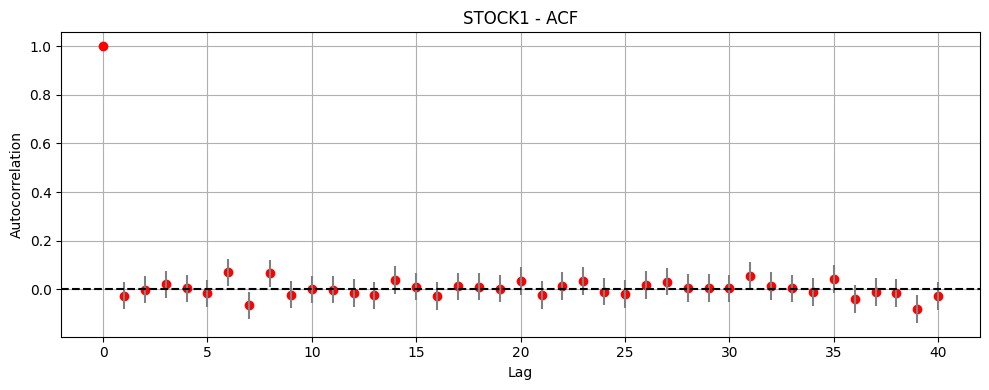

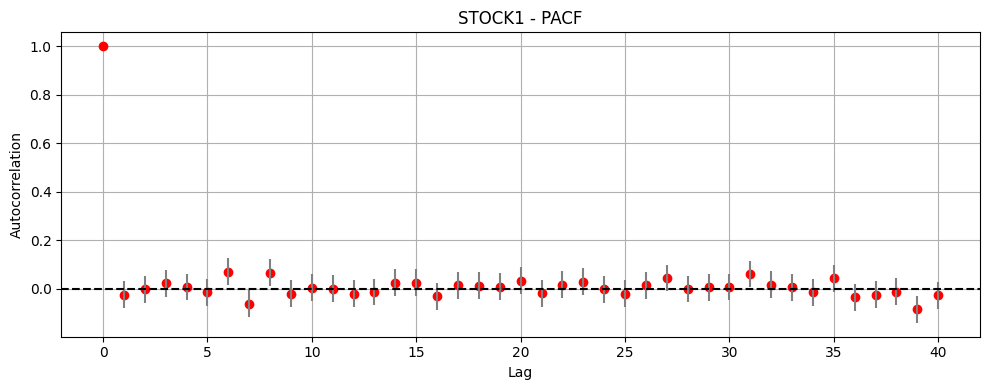


=== STOCK2 ===


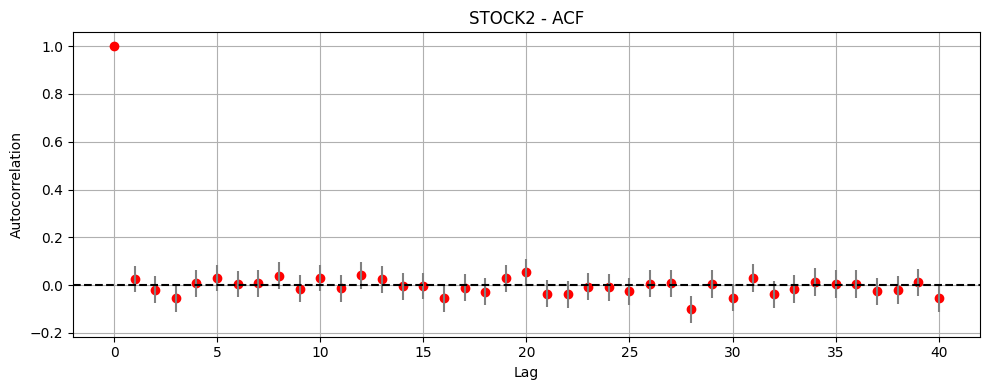

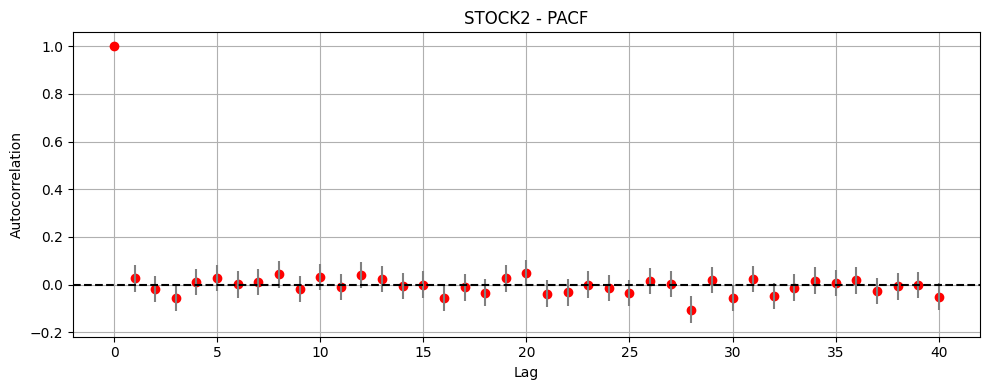


=== STOCK3 ===


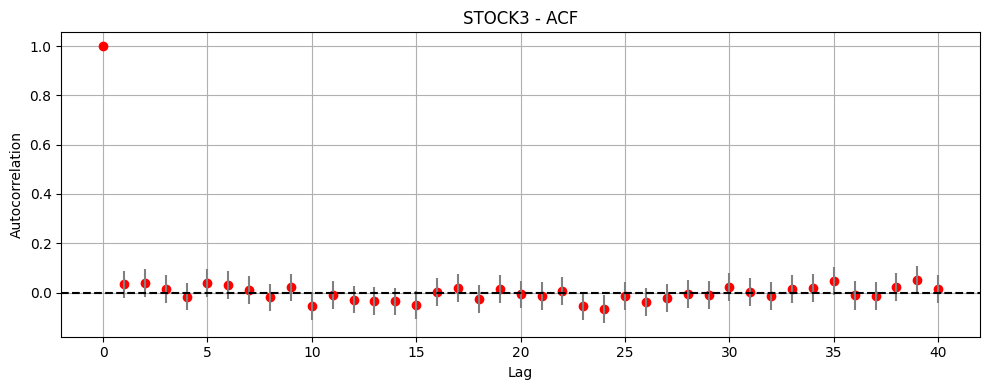

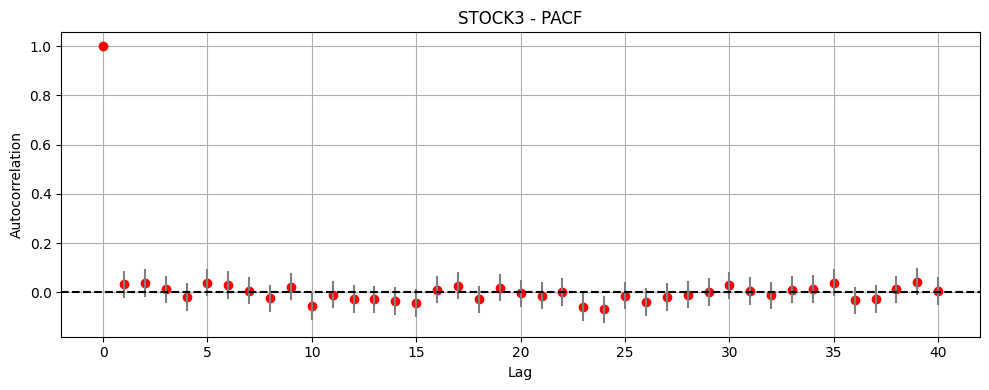


=== STOCK4 ===


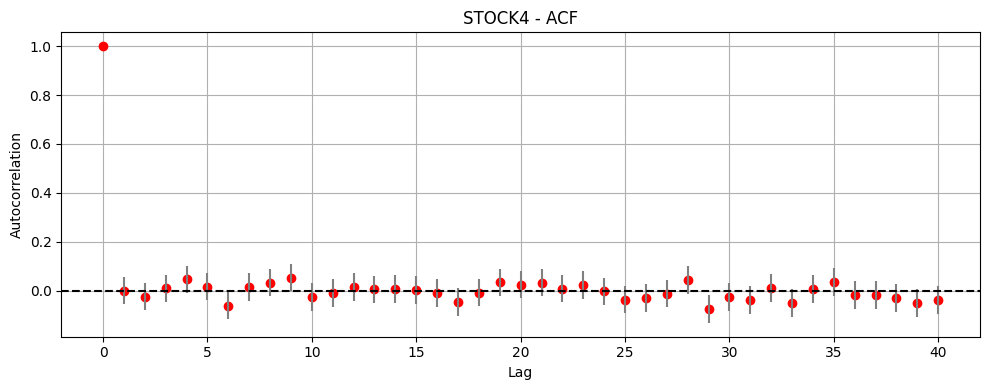

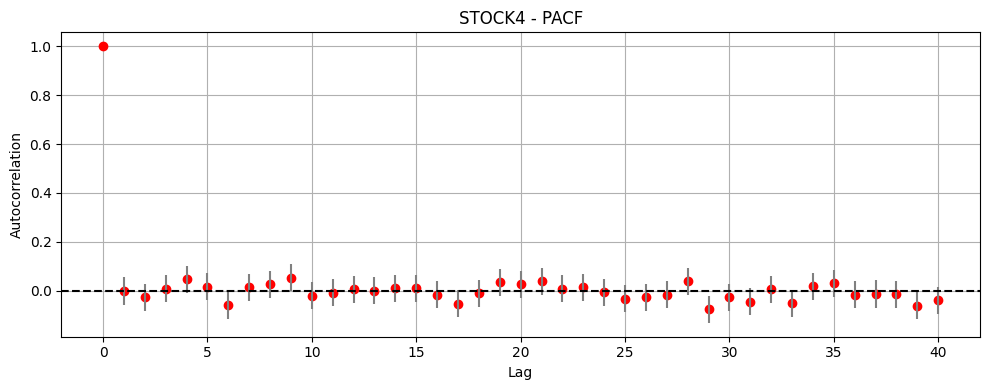


=== STOCK5 ===


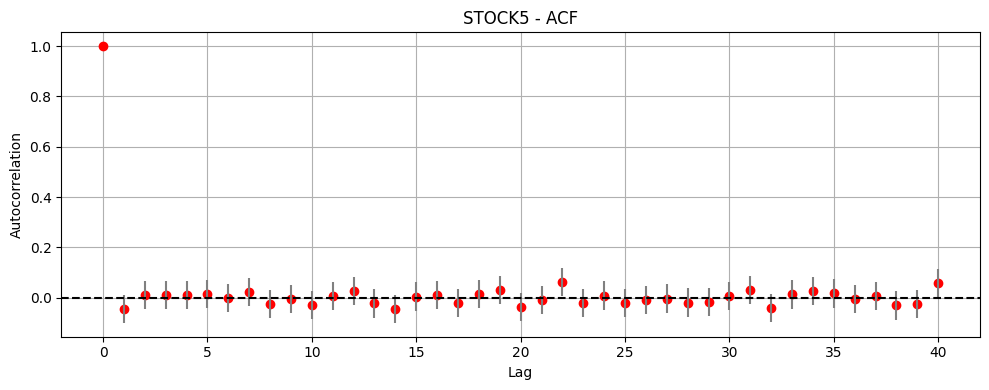

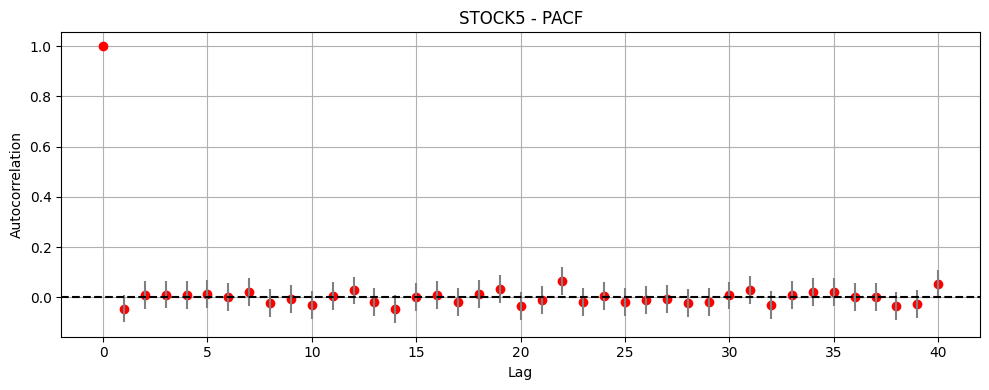


=== STOCK6 ===


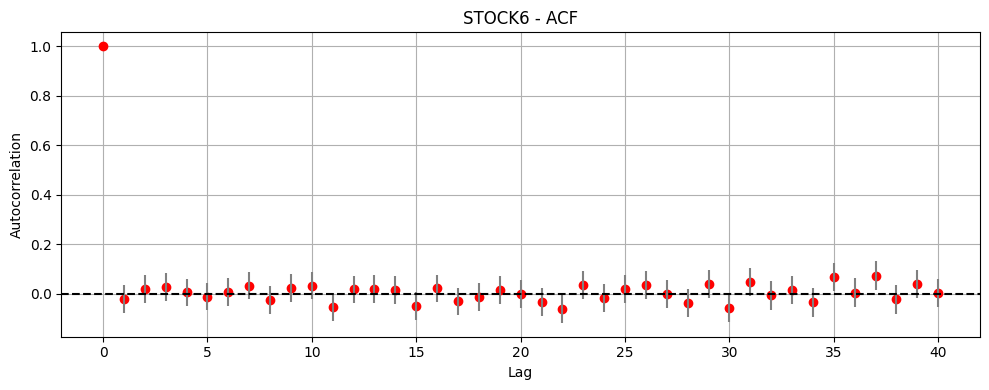

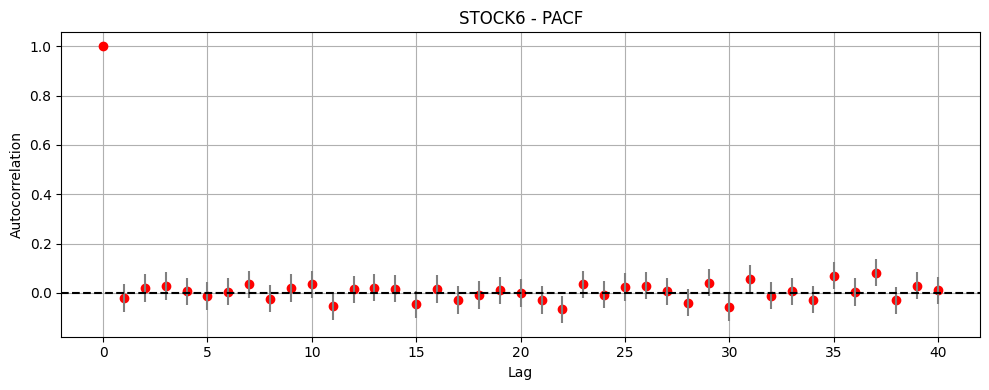


=== STOCK7 ===


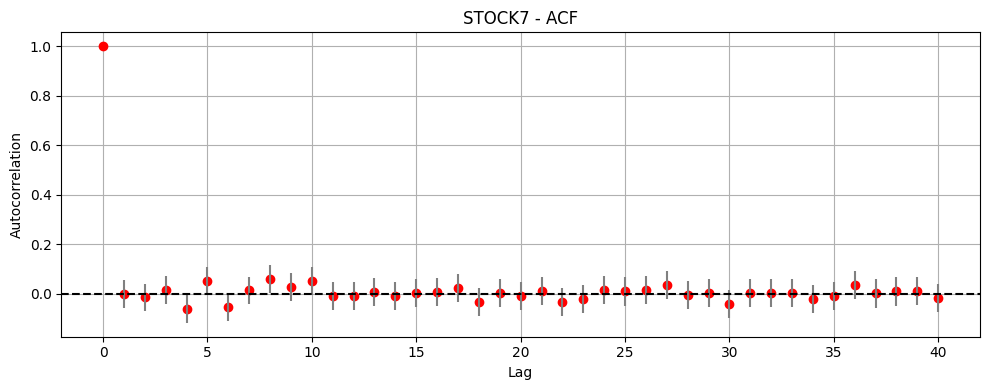

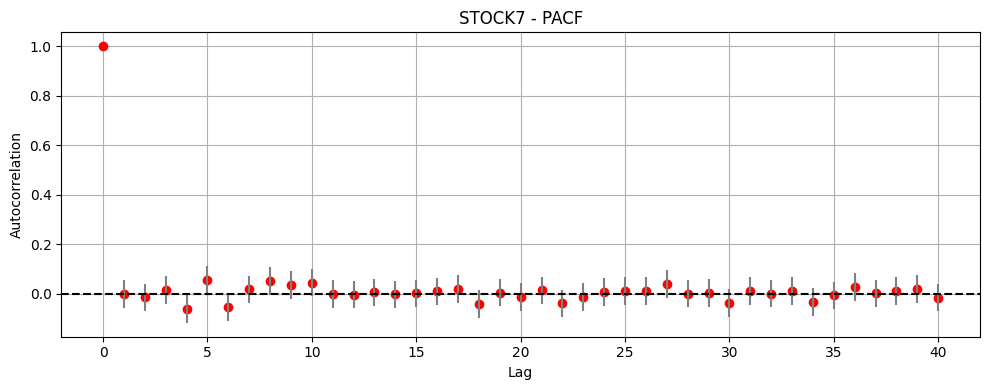


=== STOCK8 ===


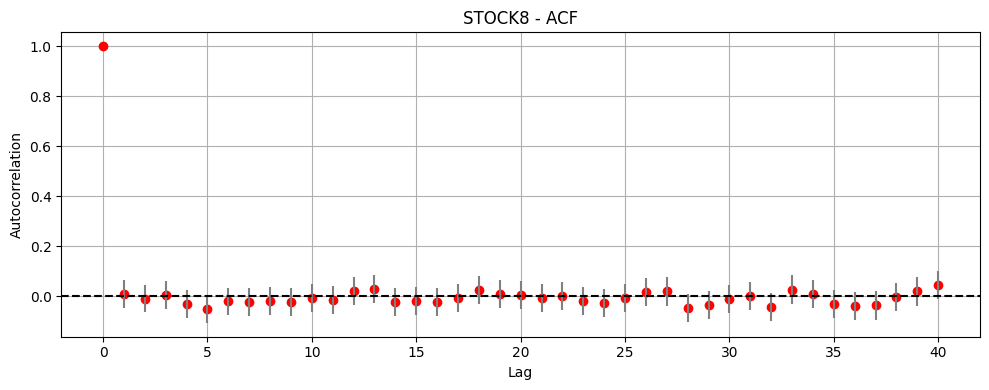

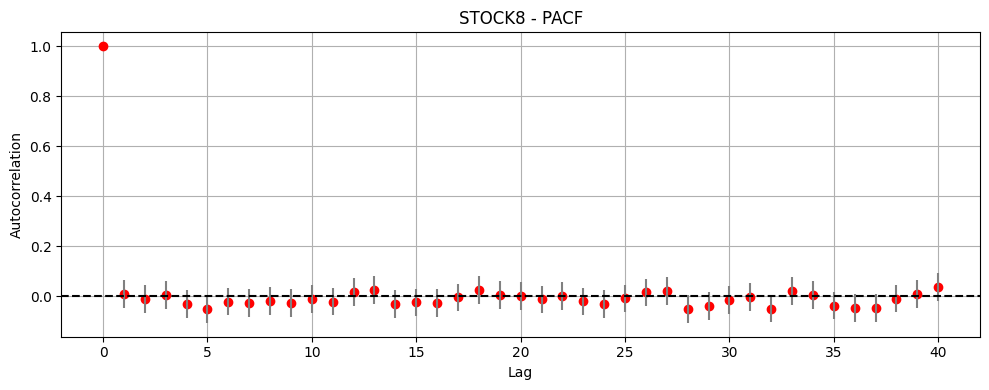


=== STOCK9 ===


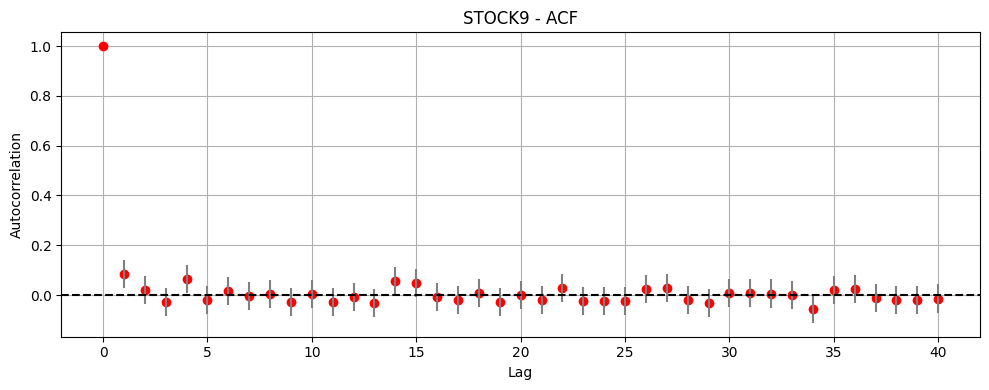

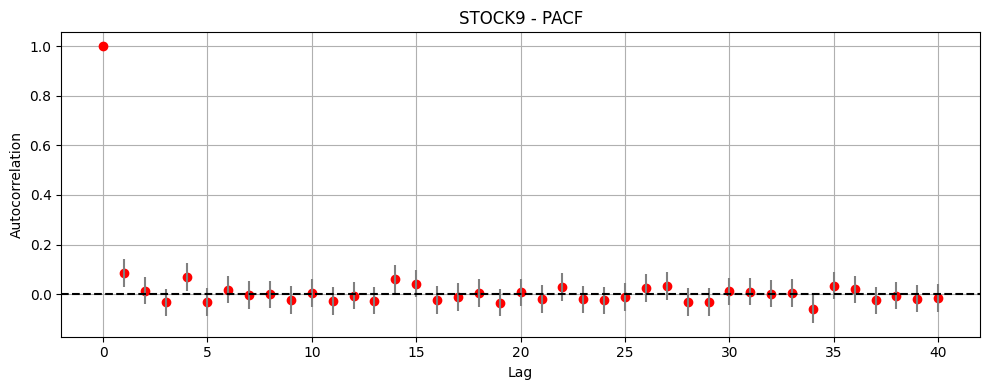


=== STOCK10 ===


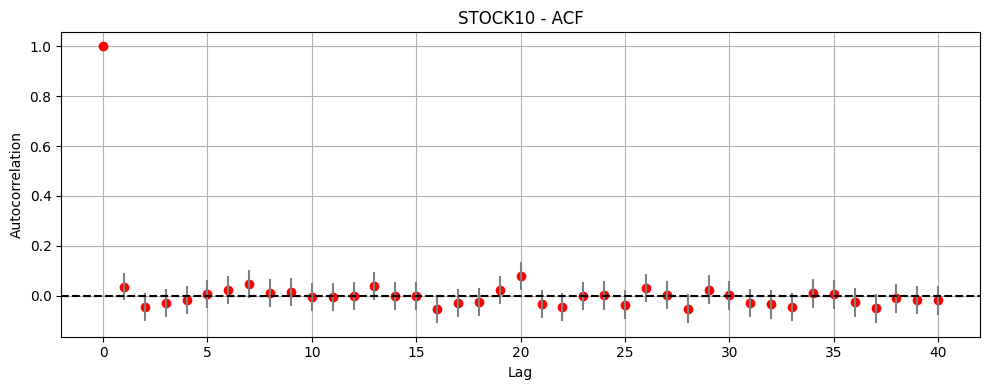

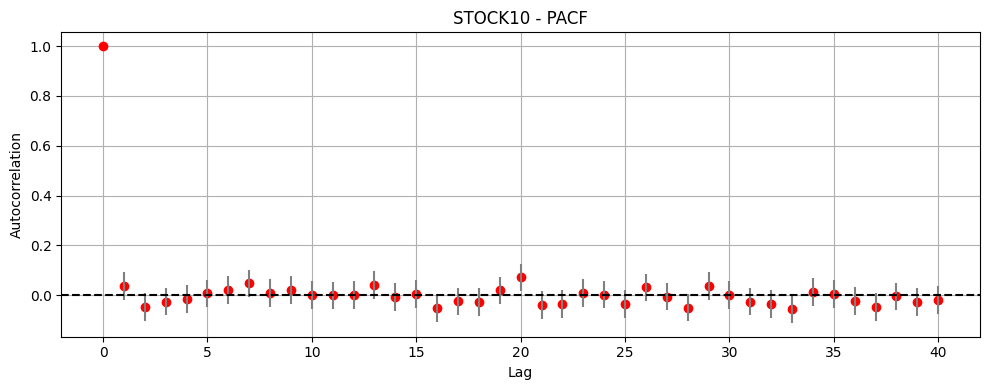


=== STOCK11 ===


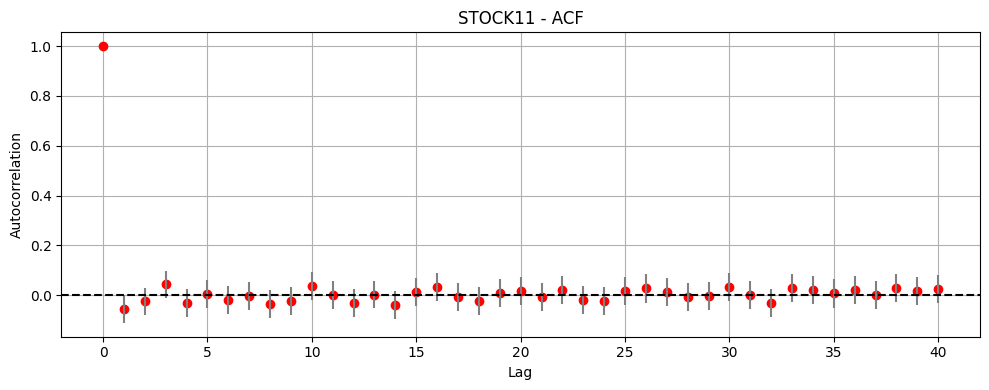

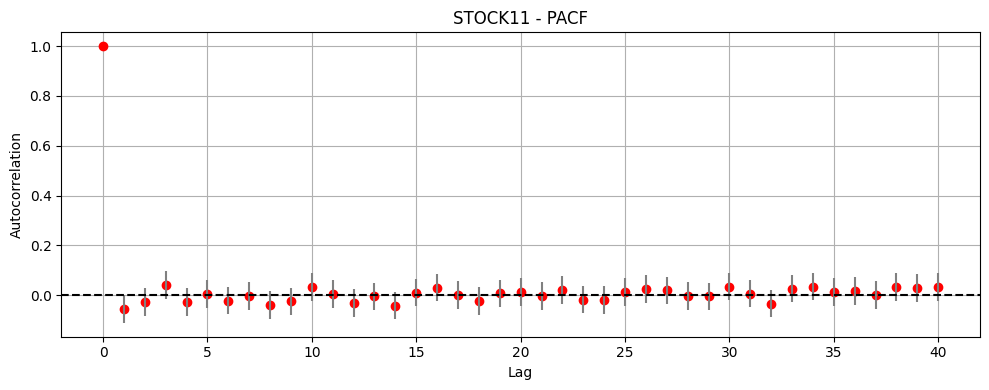


=== STOCK12 ===


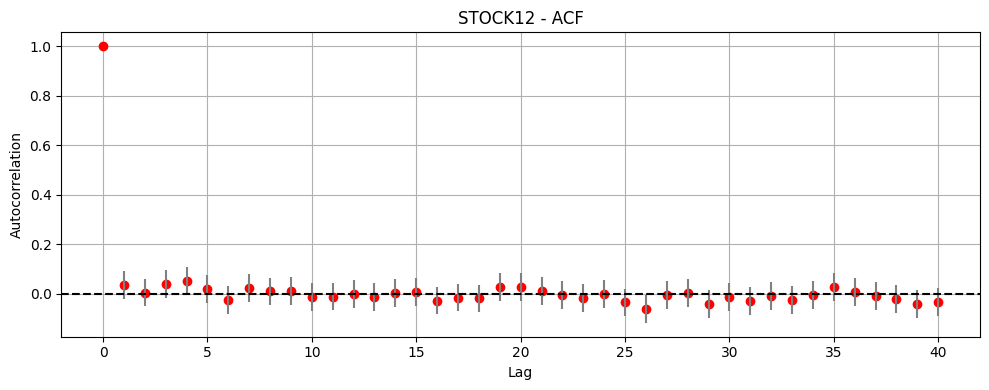

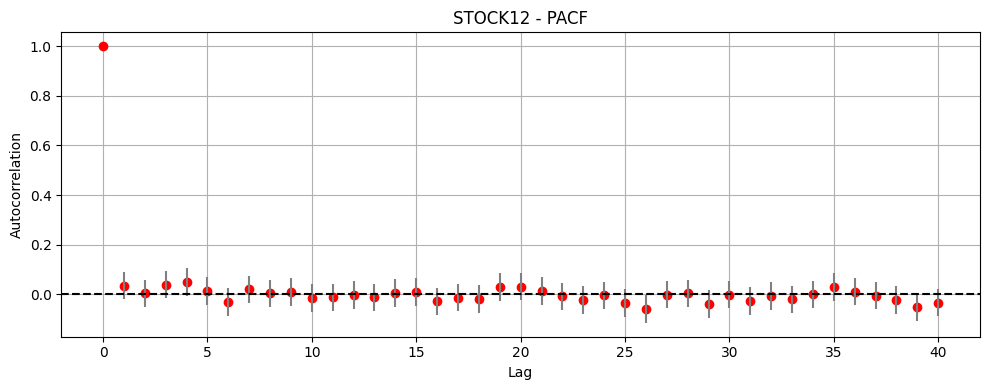


=== STOCK13 ===


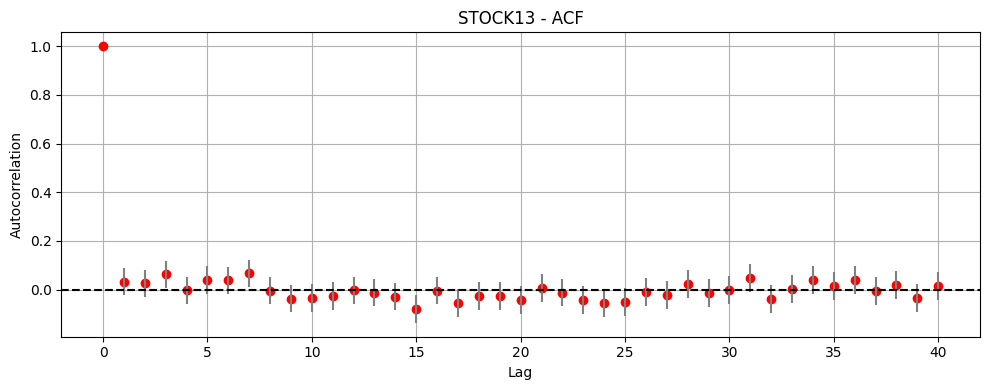

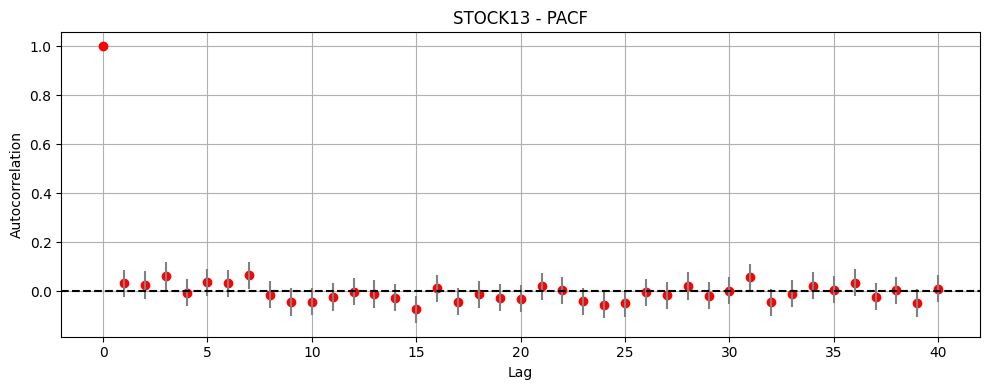


=== STOCK14 ===


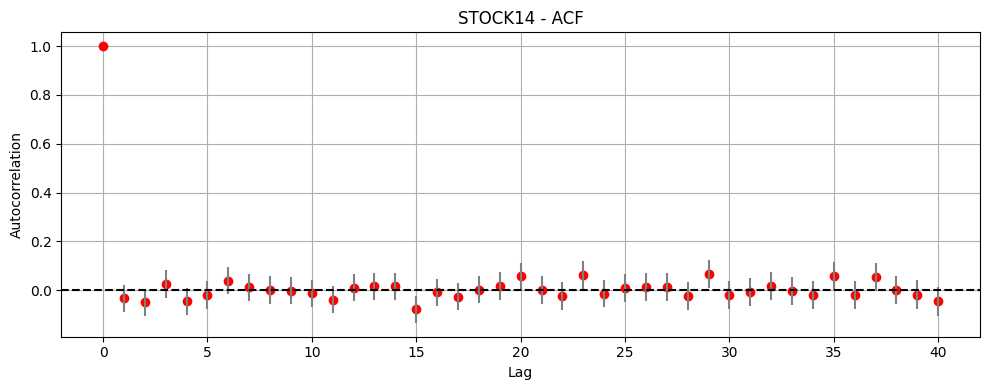

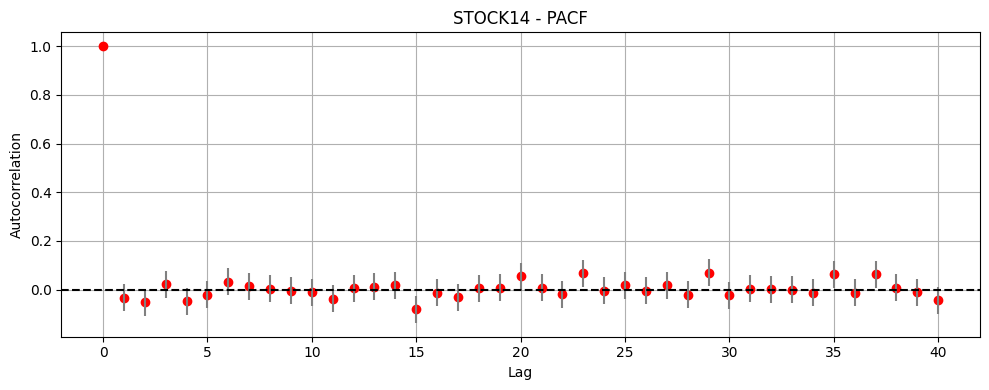


=== STOCK15 ===


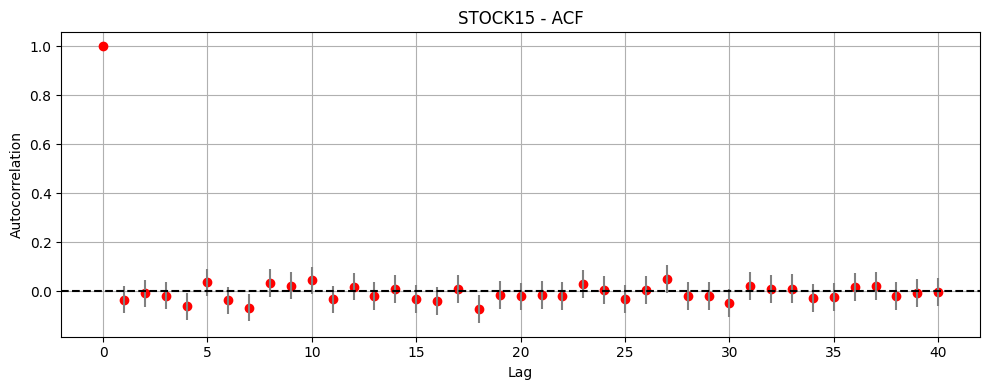

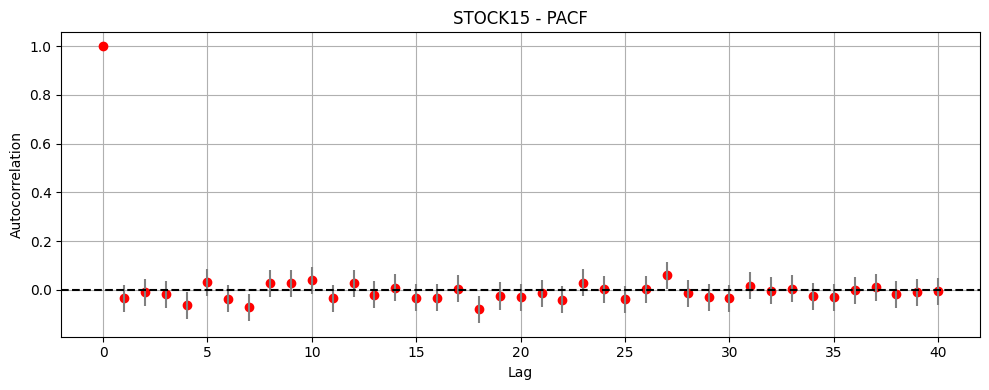


=== STOCK16 ===


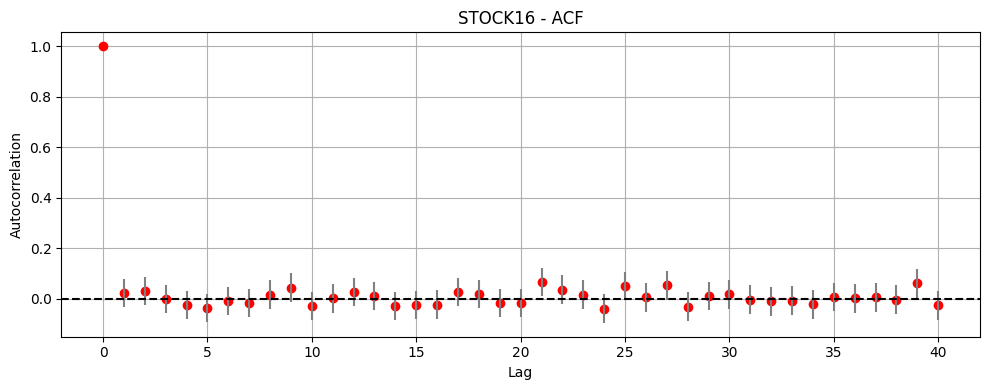

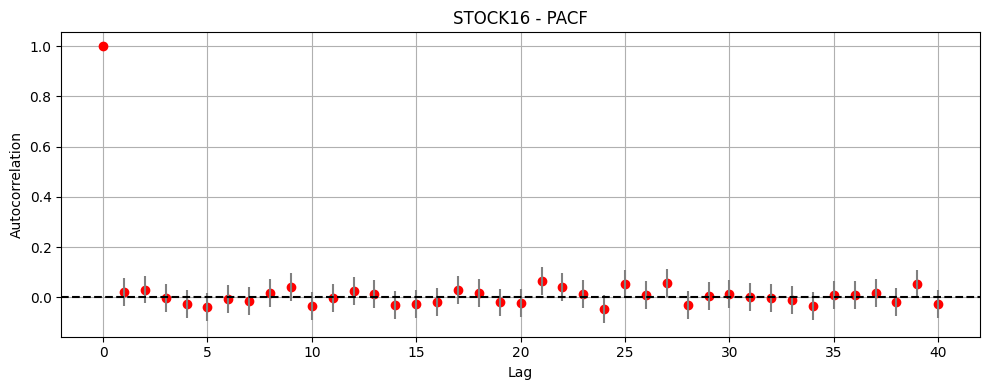


=== STOCK17 ===


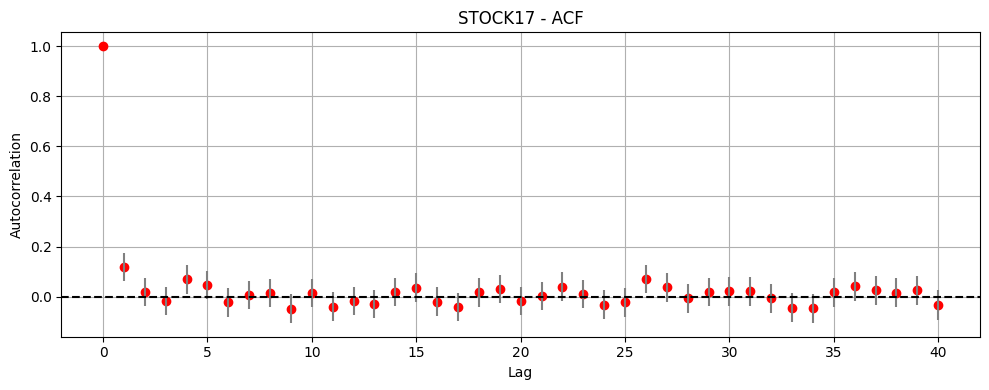

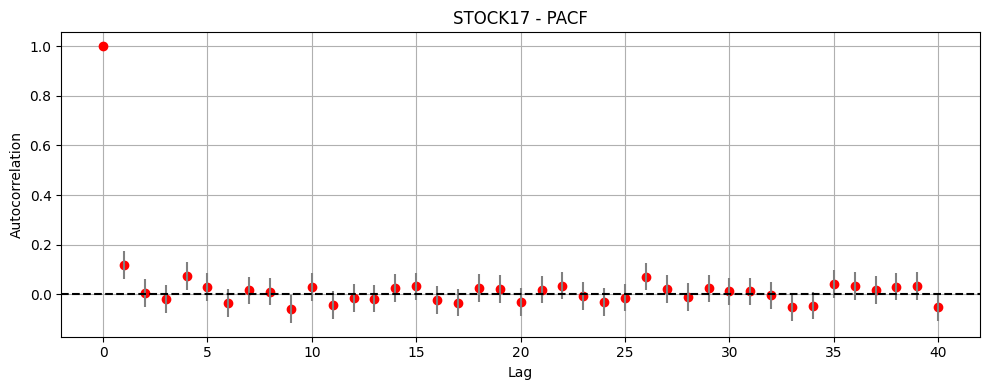


=== STOCK18 ===


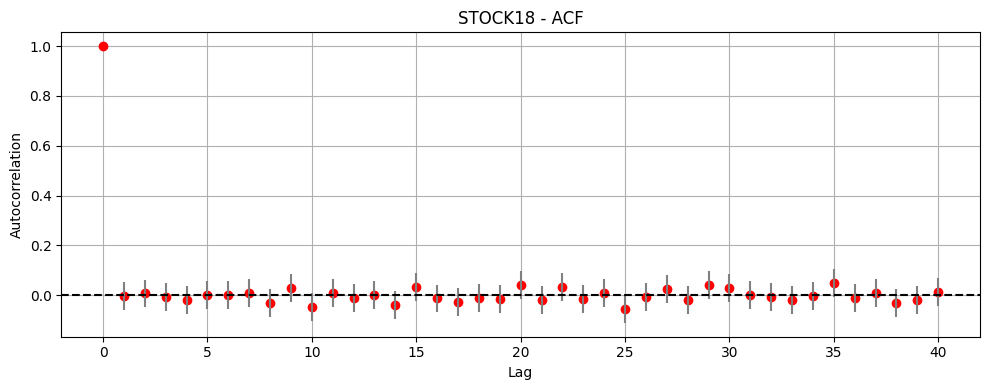

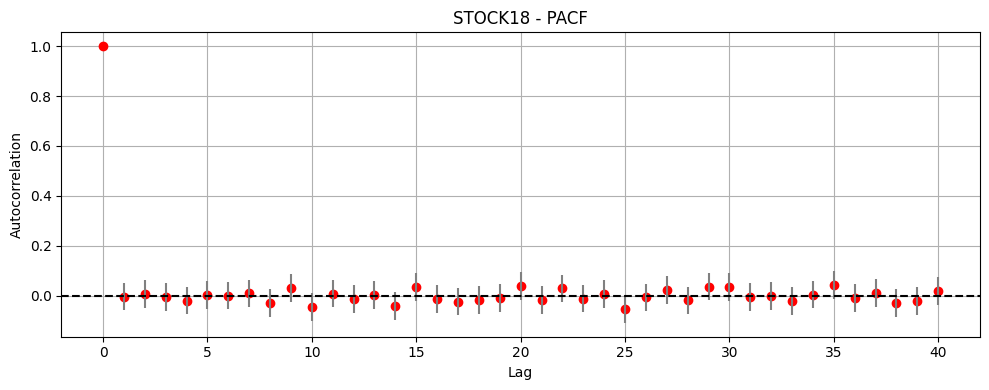


=== STOCK19 ===


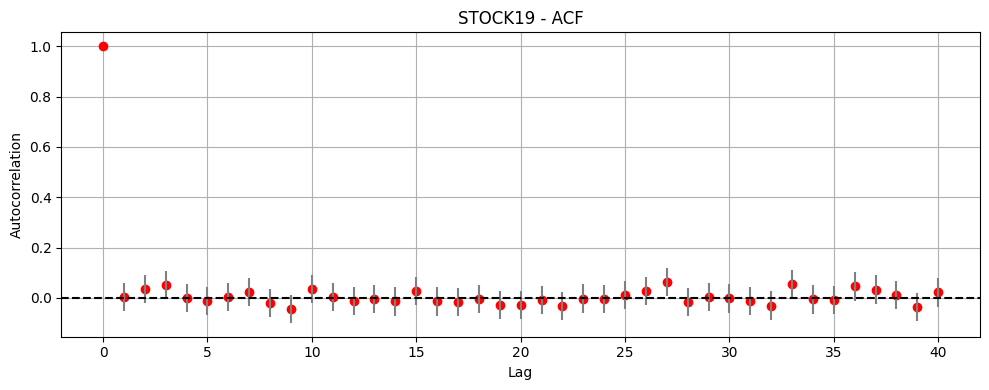

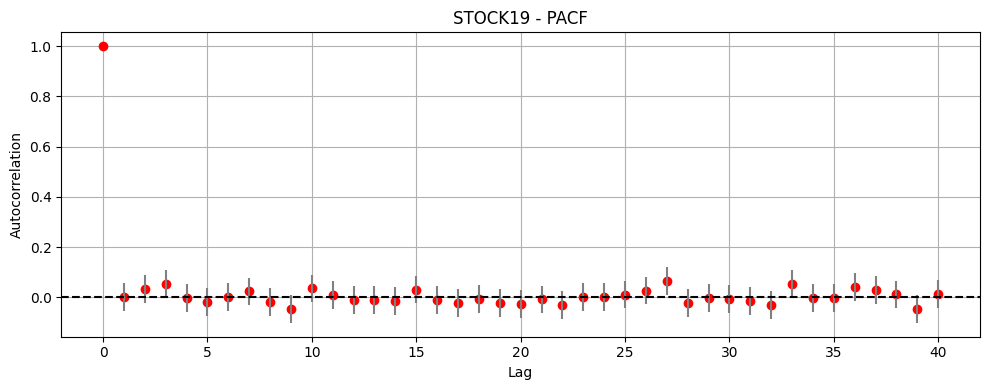


=== STOCK20 ===


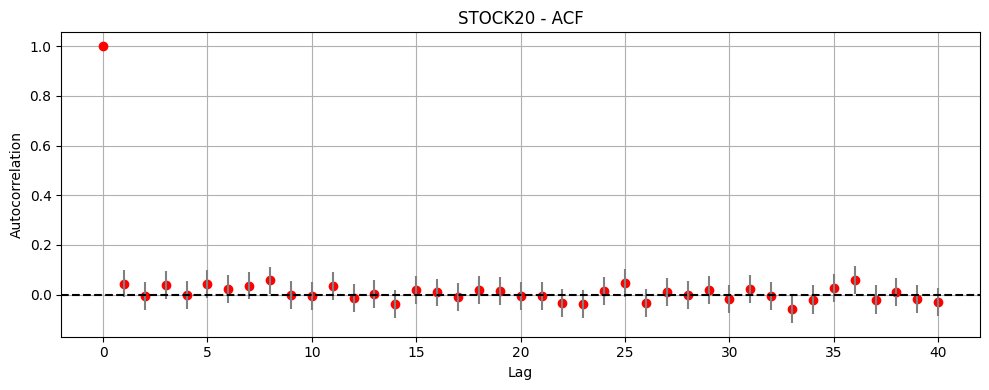

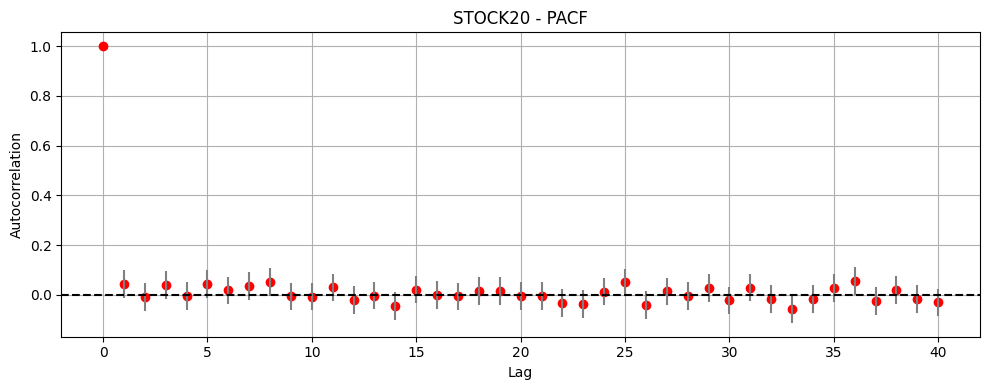


=== STOCK21 ===


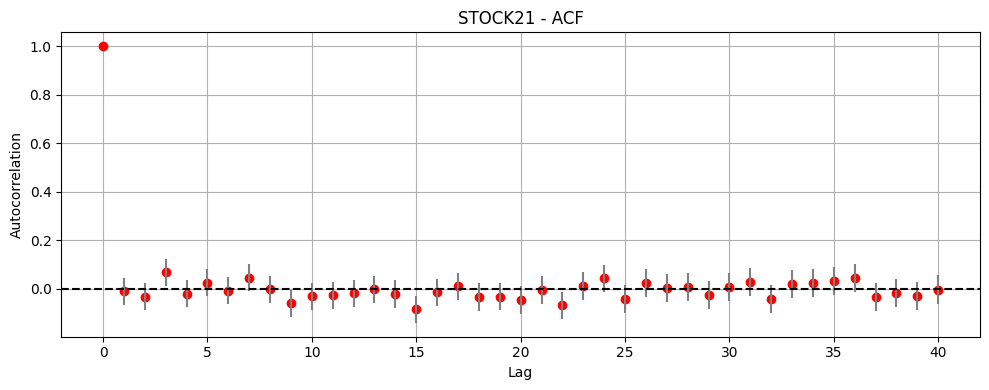

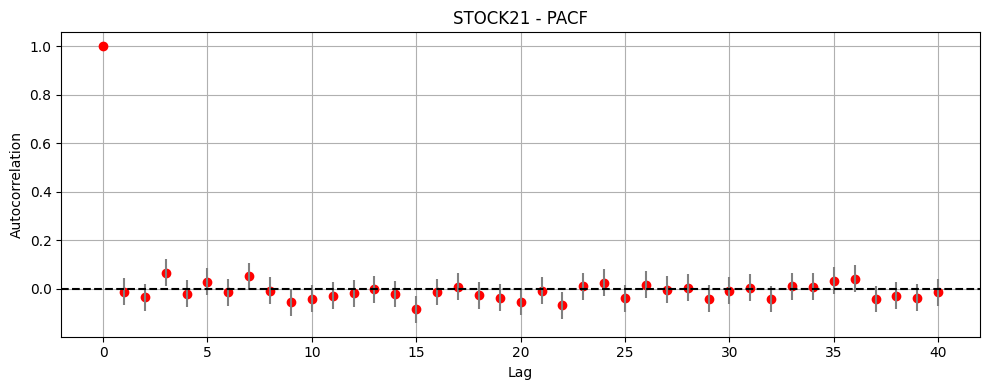


=== STOCK22 ===


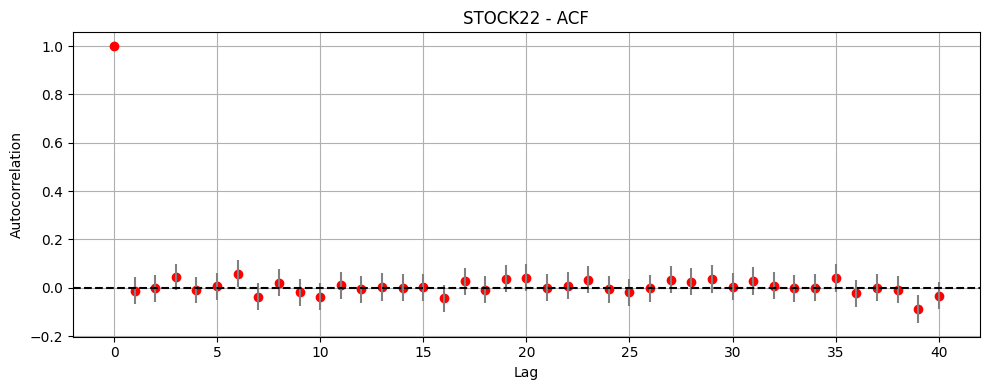

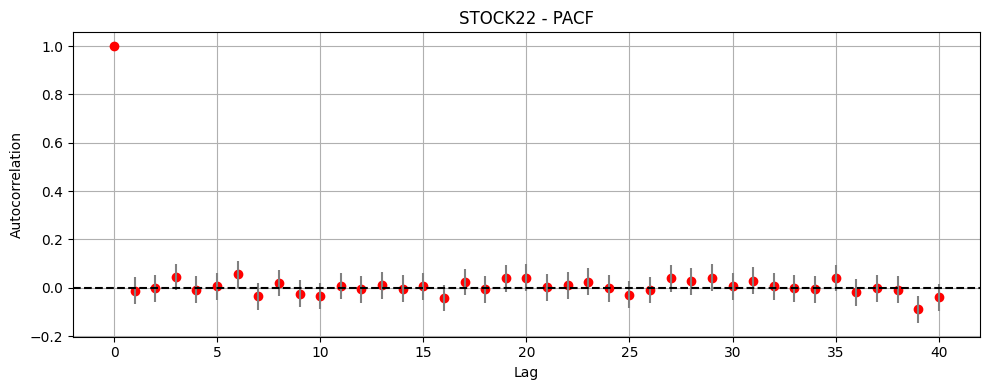


=== STOCK23 ===


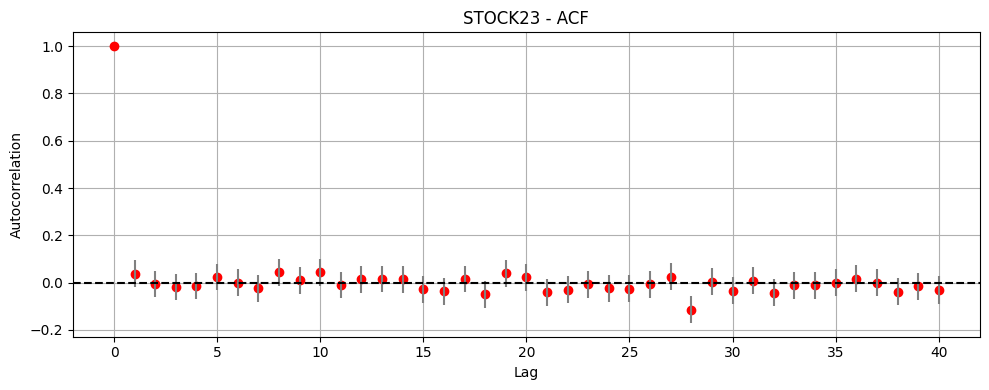

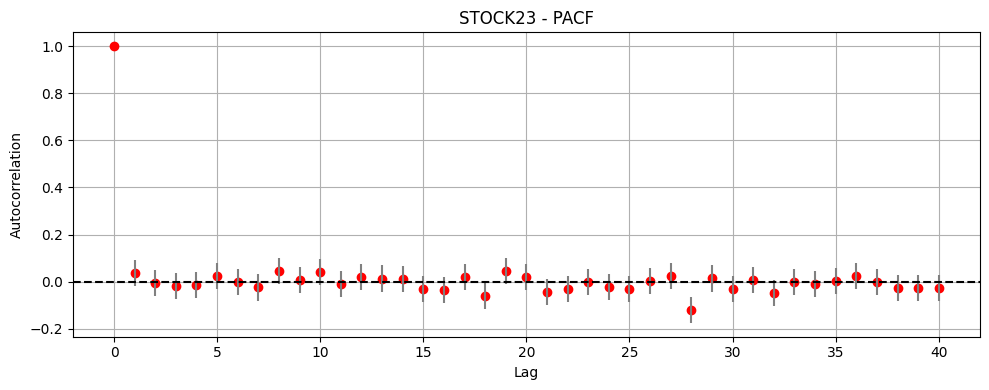


=== STOCK24 ===


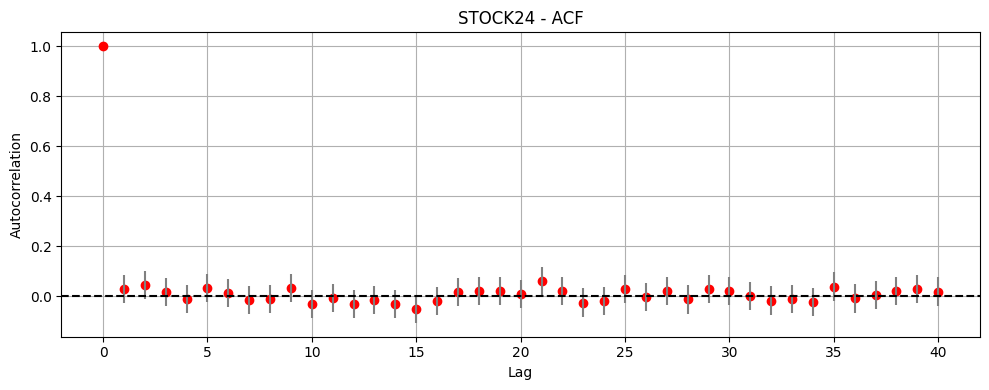

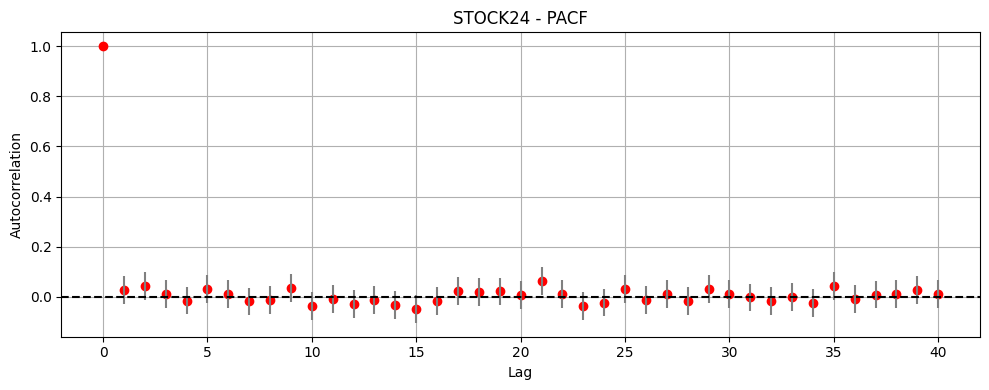


=== STOCK25 ===


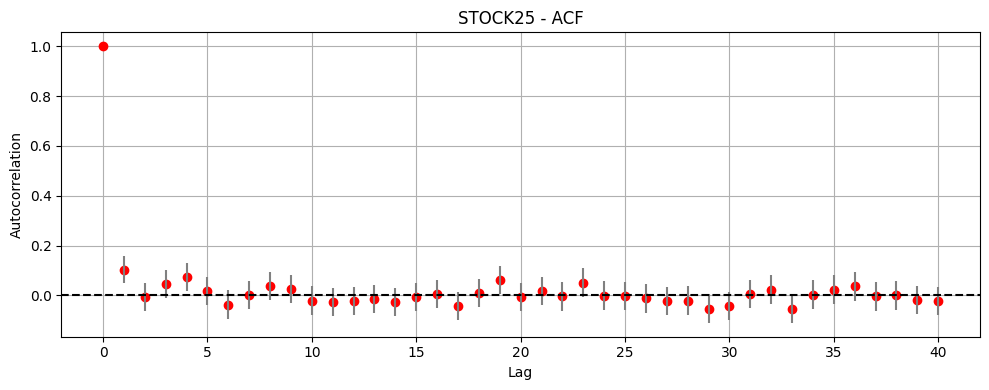

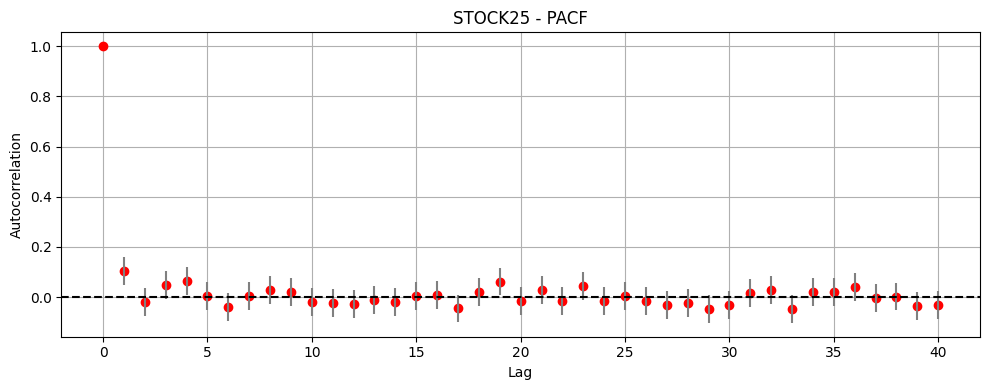


=== STOCK26 ===


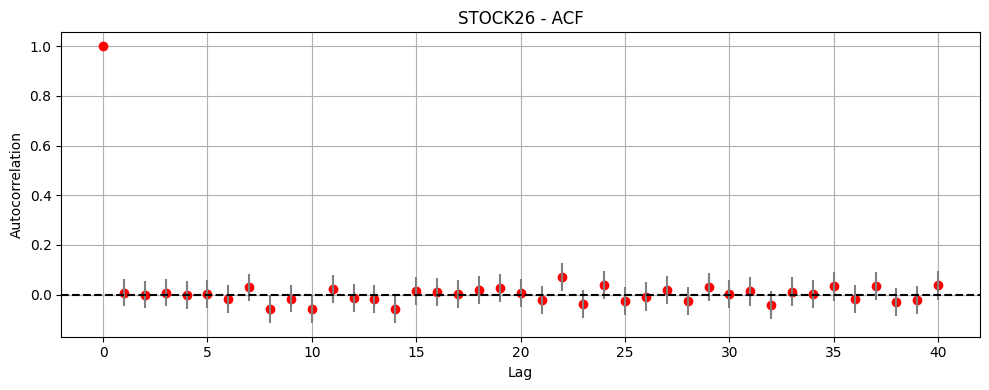

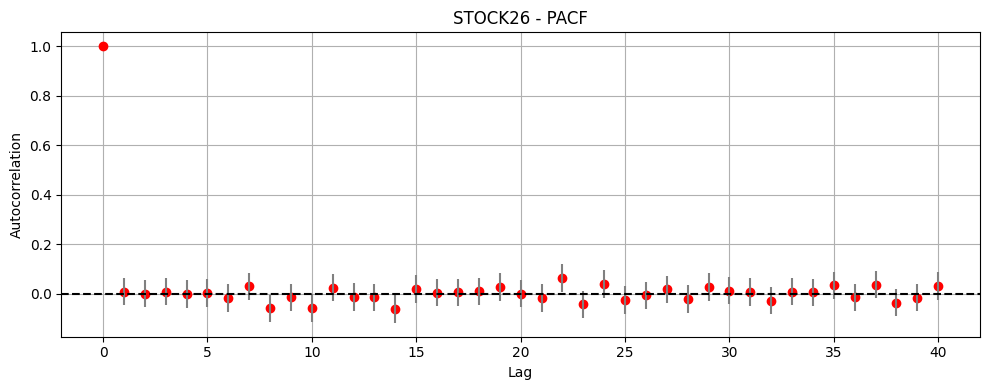


=== STOCK27 ===


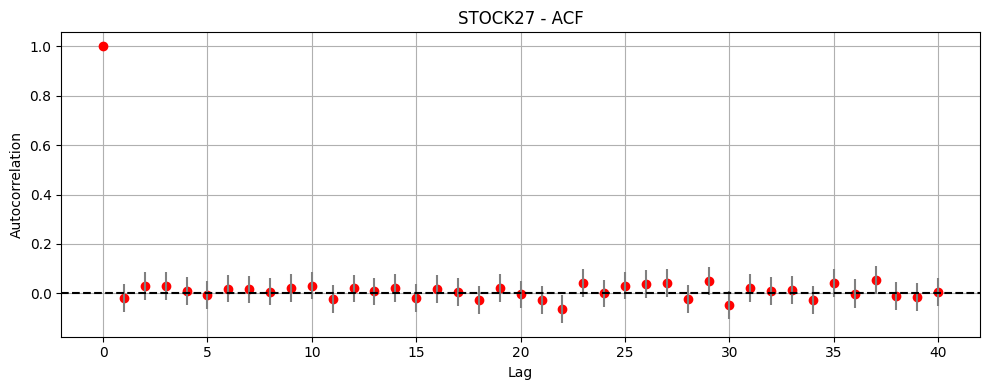

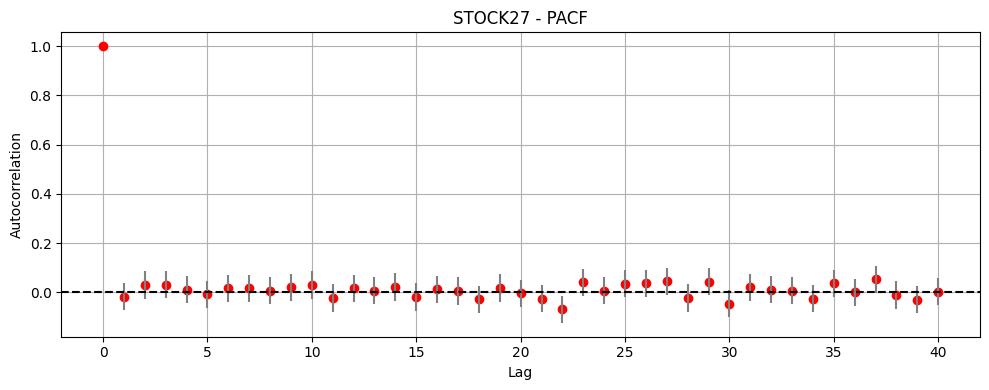


=== STOCK28 ===


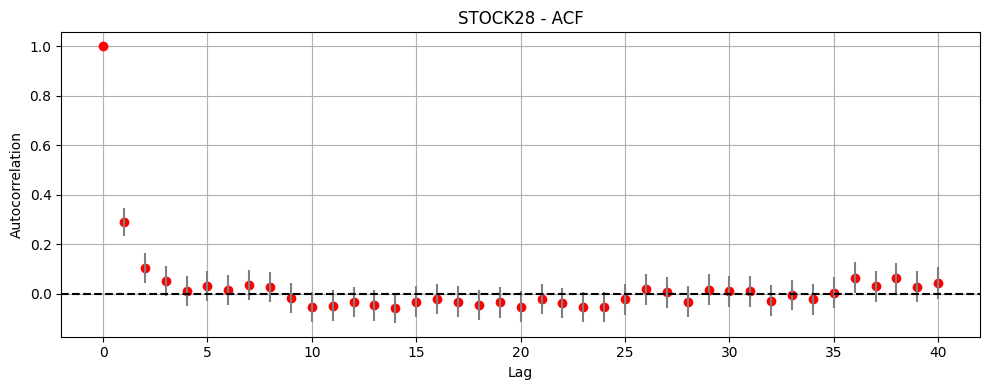

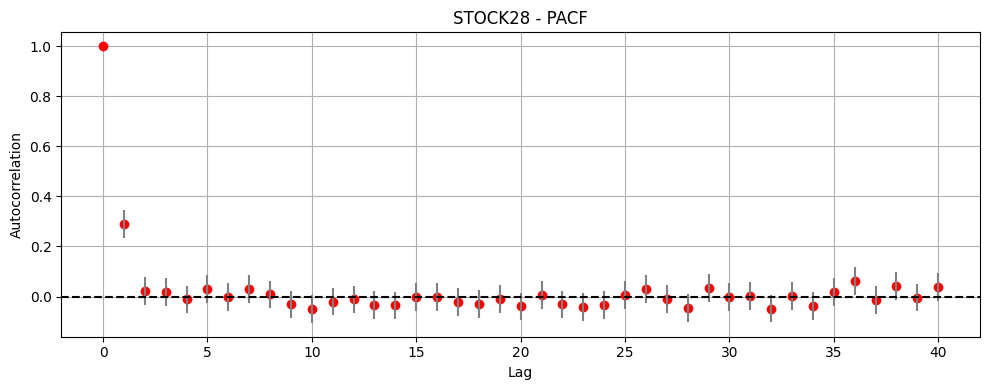


=== STOCK29 ===


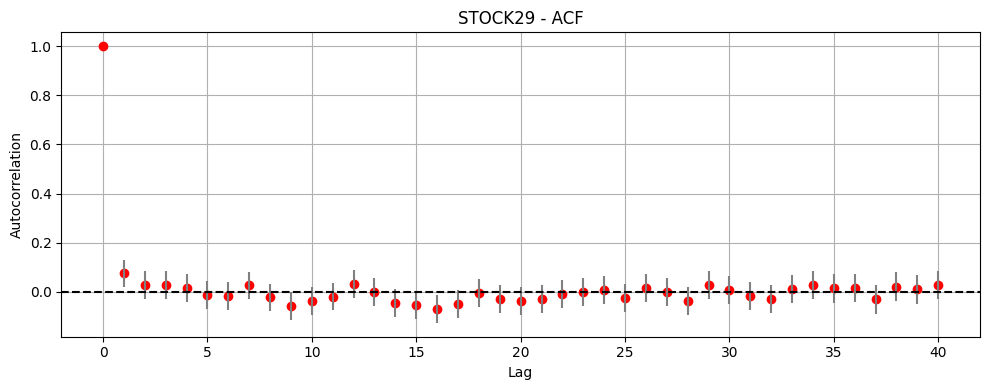

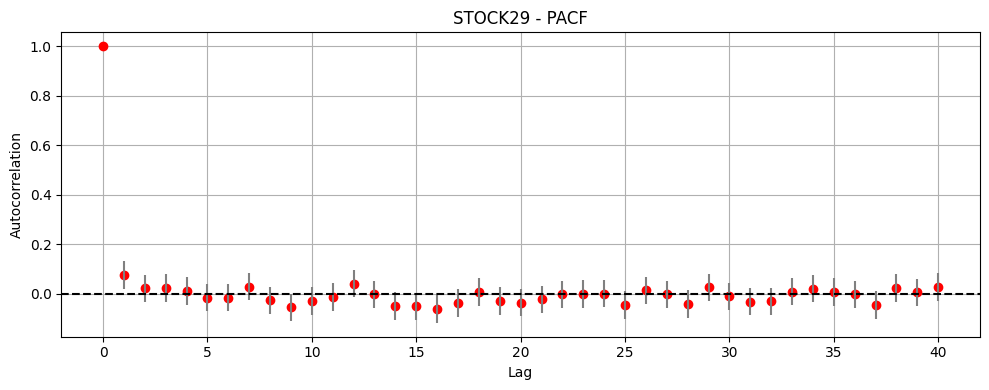


=== STOCK30 ===


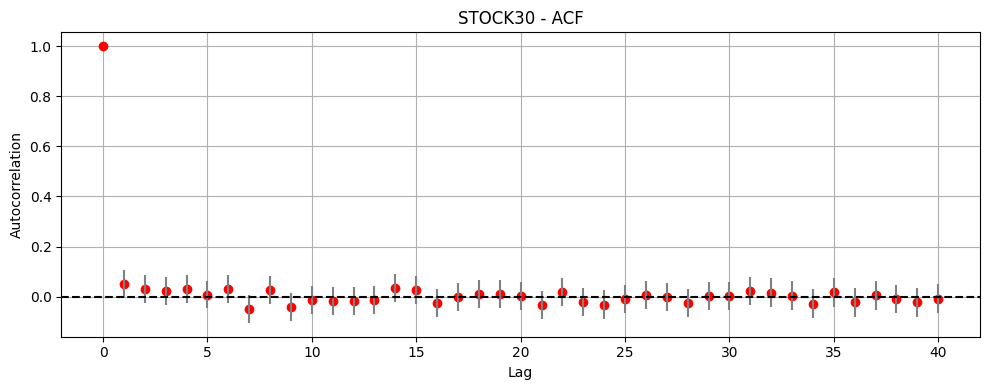

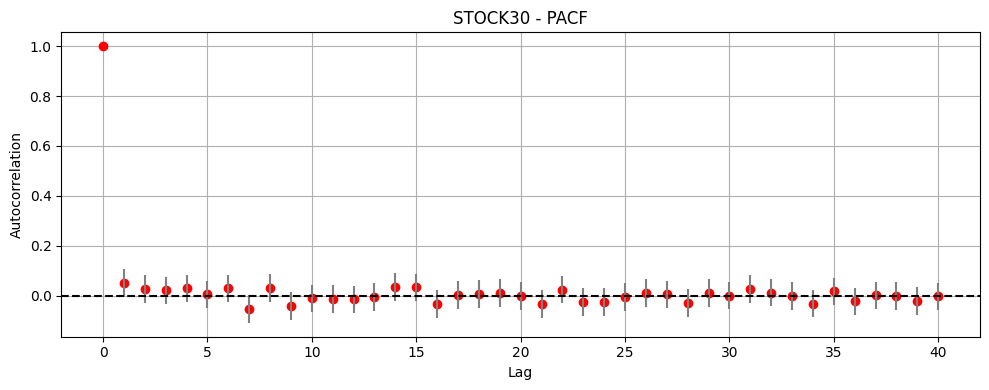


=== STOCK31 ===


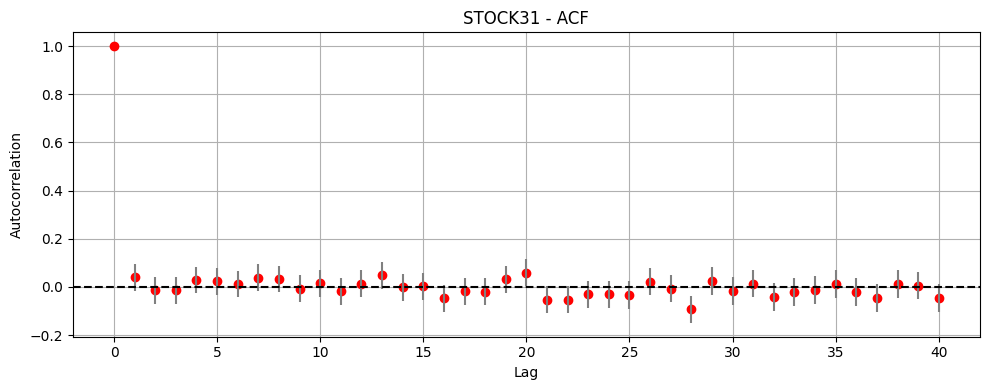

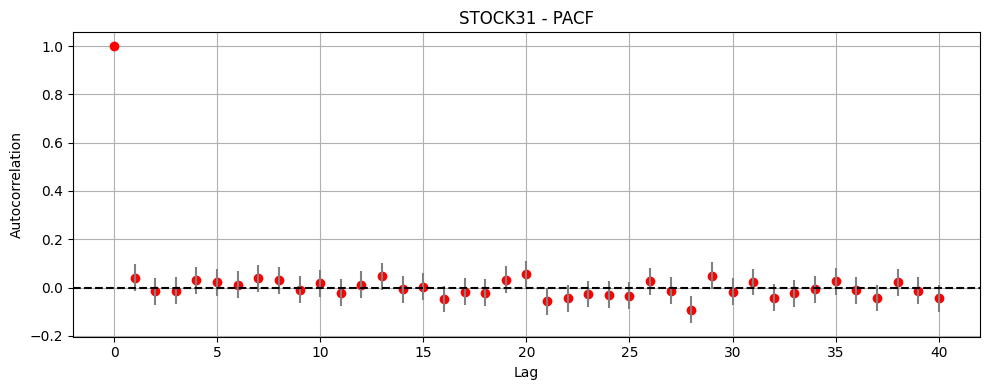


=== STOCK32 ===


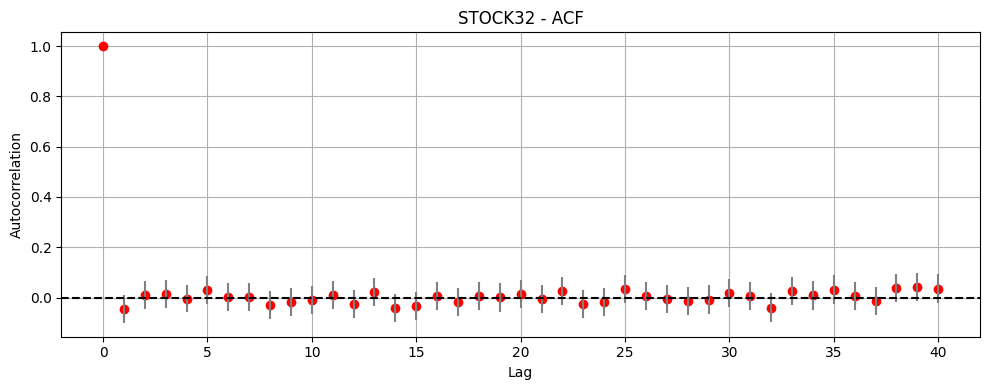

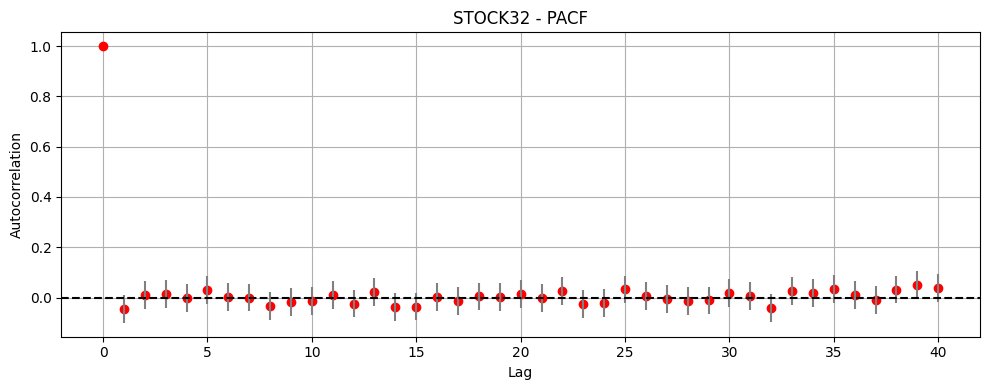


=== STOCK33 ===


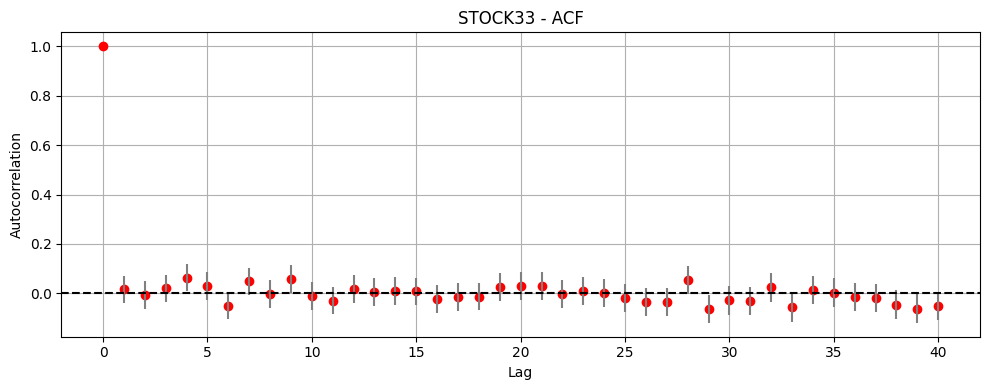

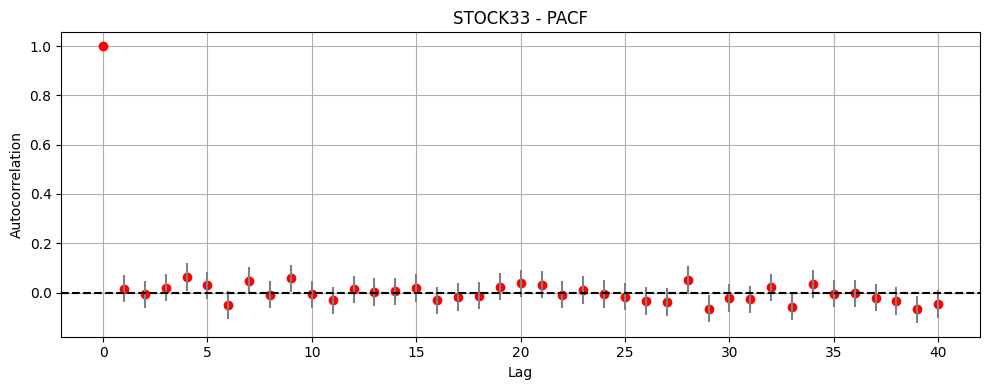


=== STOCK34 ===


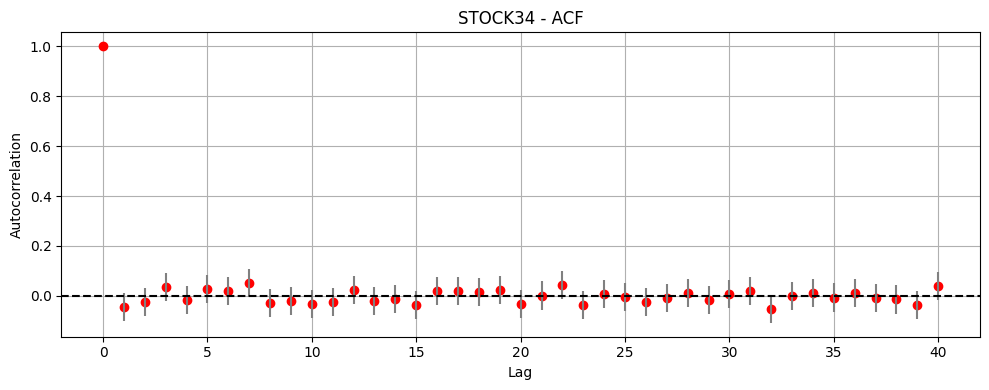

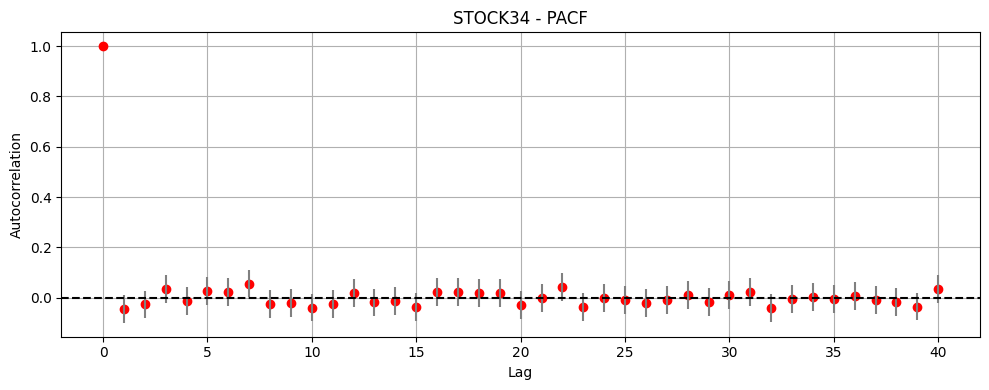


=== STOCK35 ===


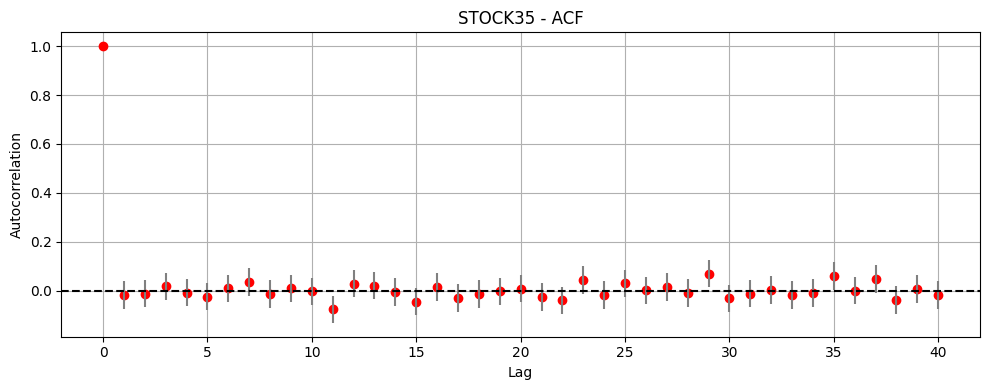

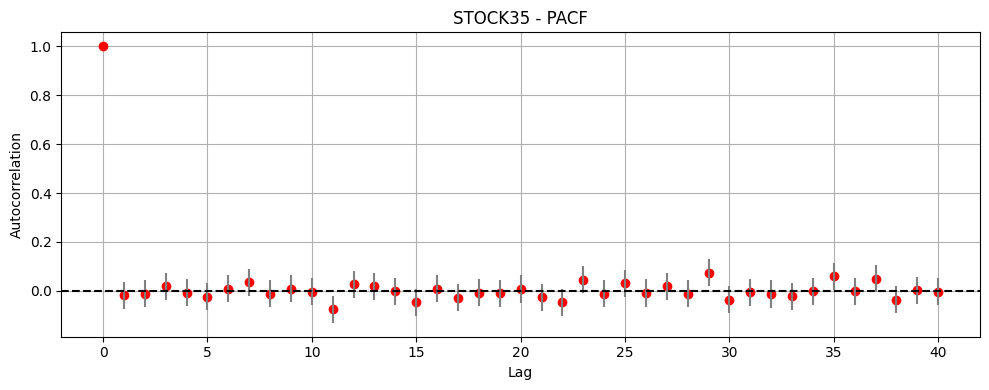


=== STOCK36 ===


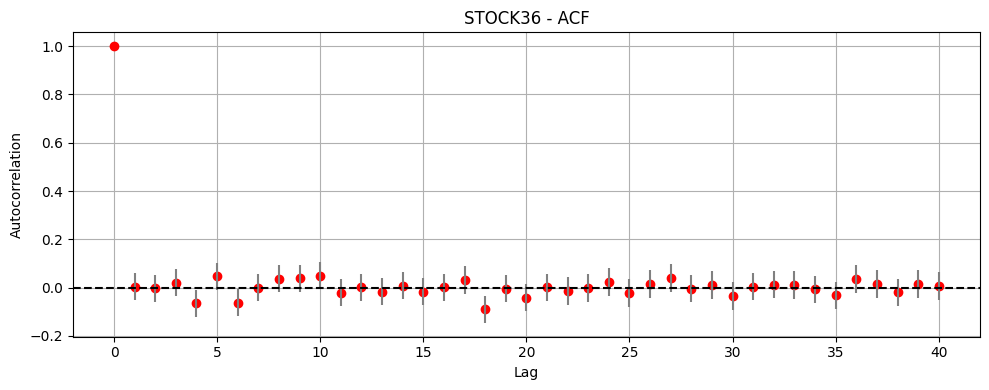

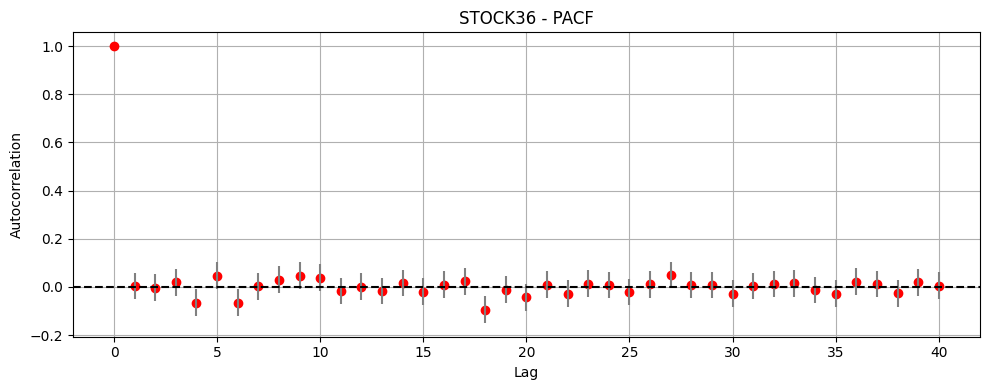


=== STOCK37 ===


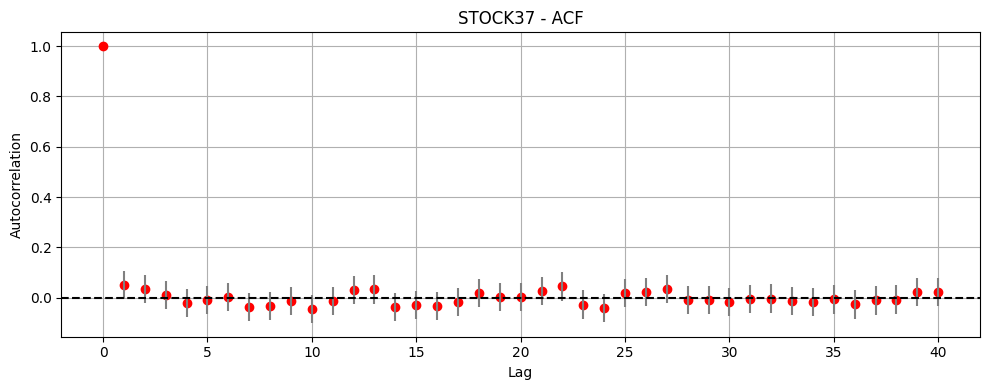

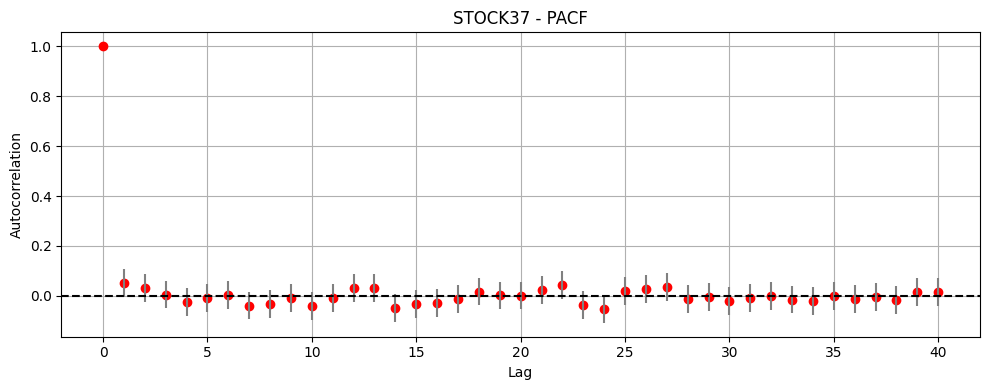


=== STOCK38 ===


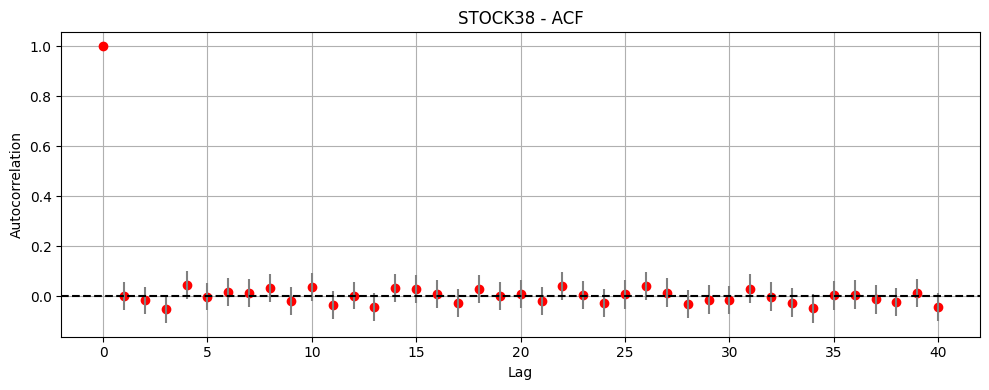

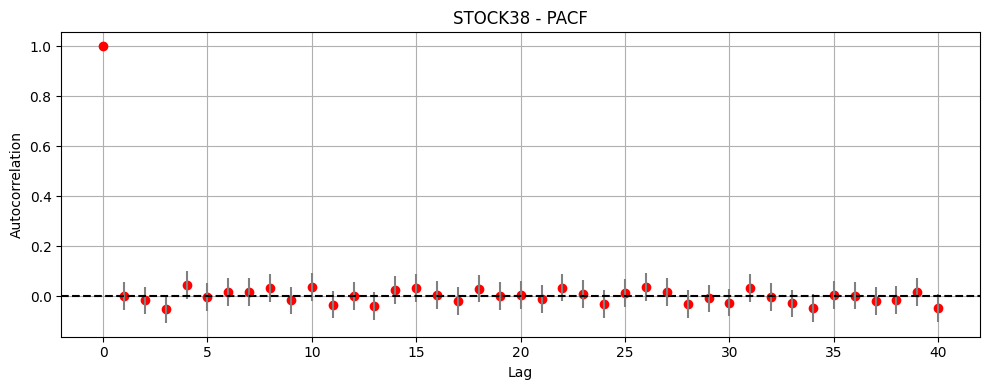


=== STOCK39 ===


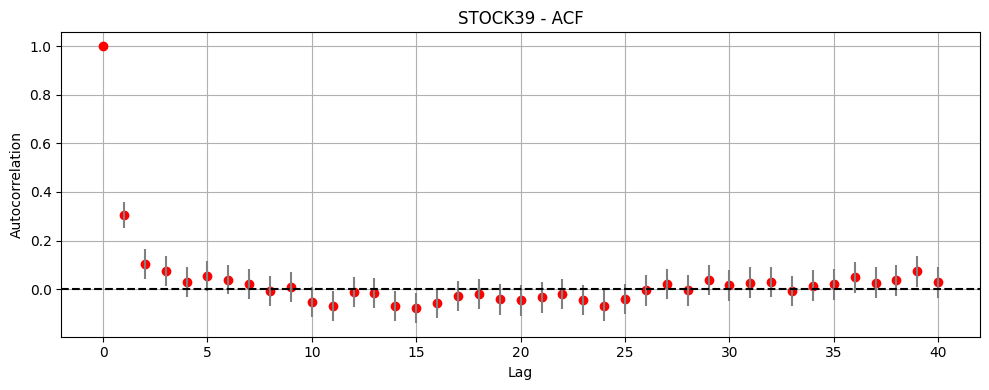

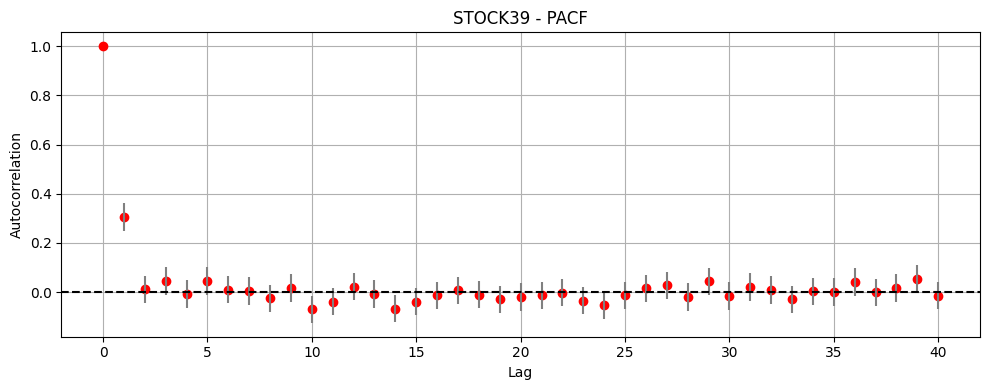


=== STOCK40 ===


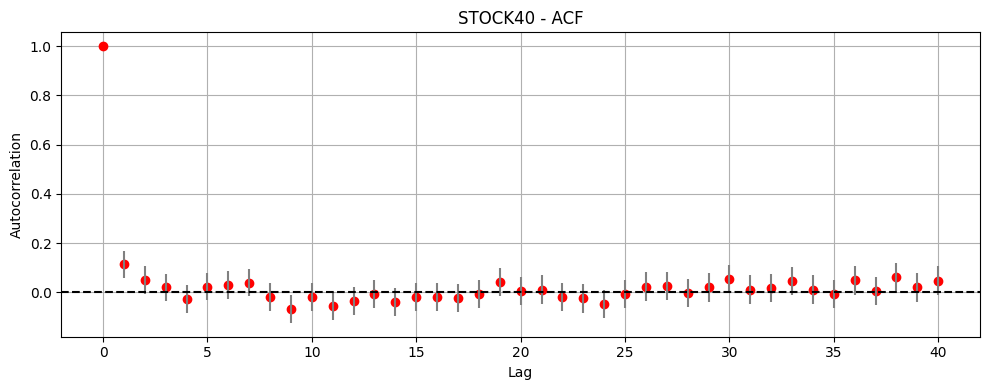

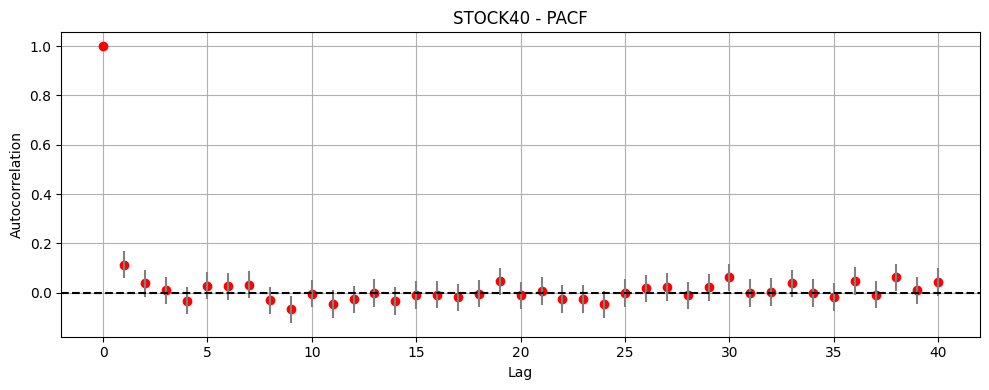


=== STOCK41 ===


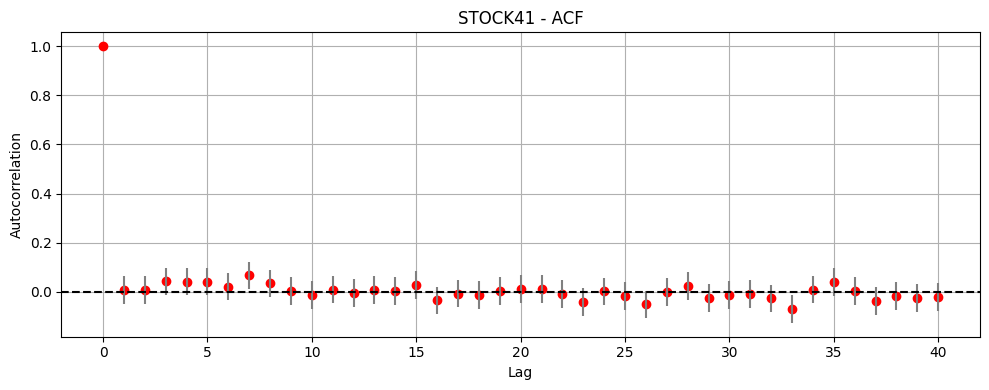

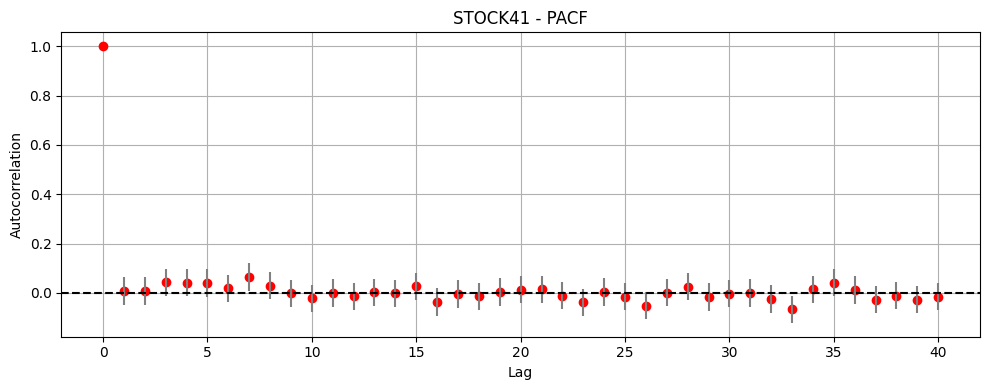


=== STOCK42 ===


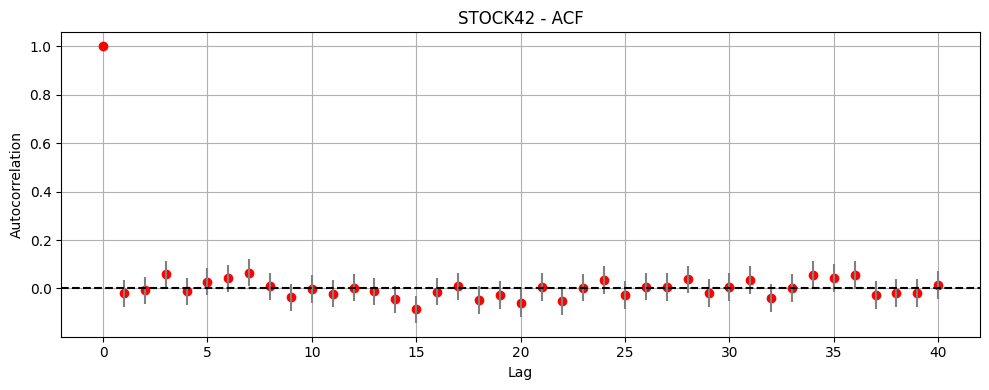

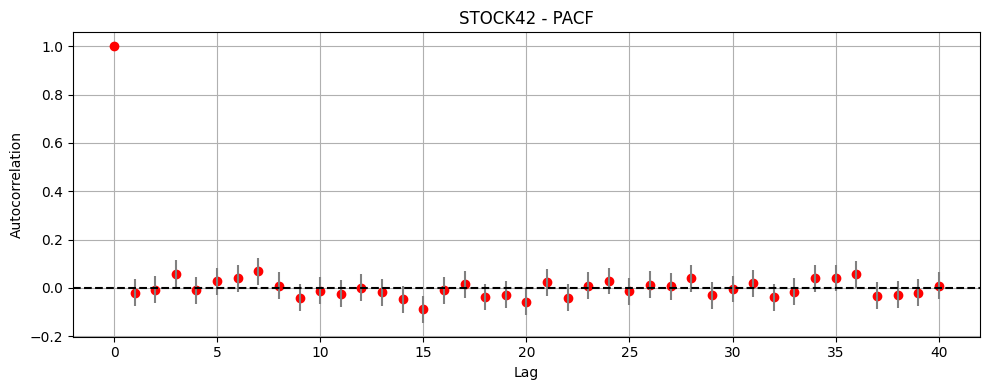


=== STOCK43 ===


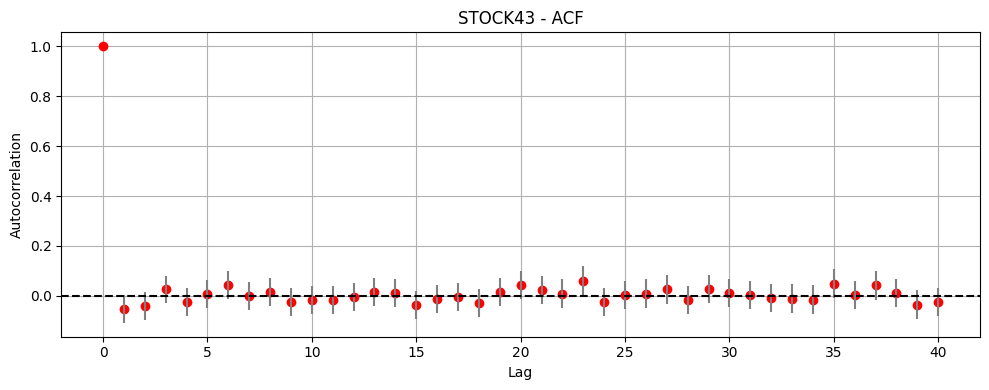

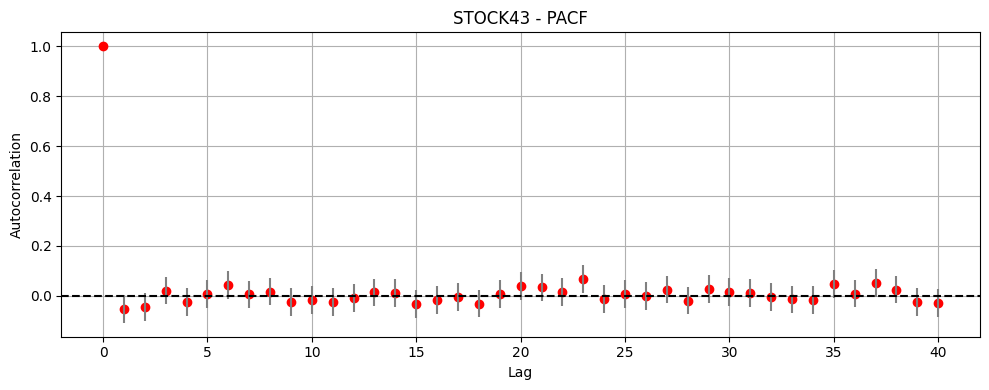


=== STOCK44 ===


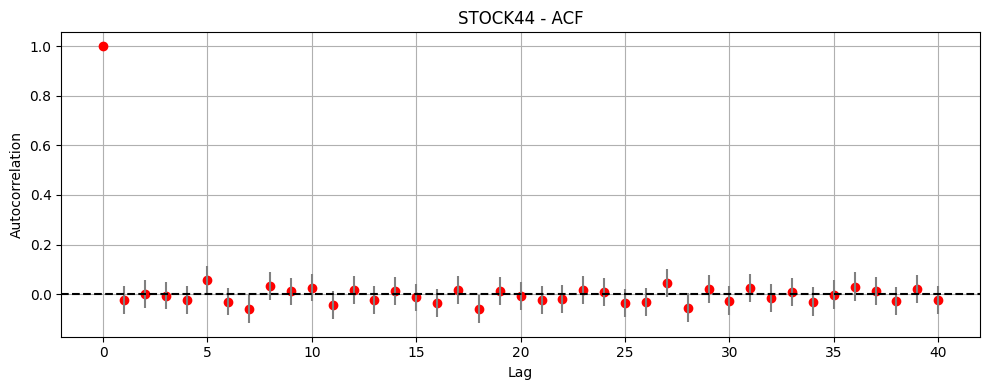

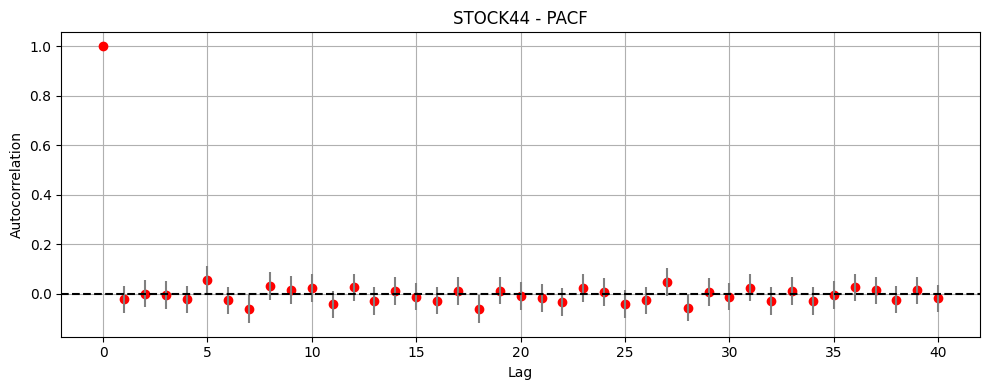


=== STOCK45 ===


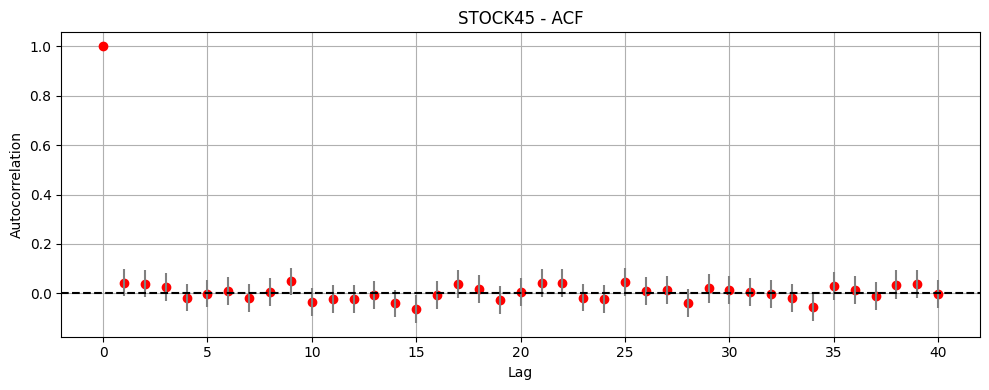

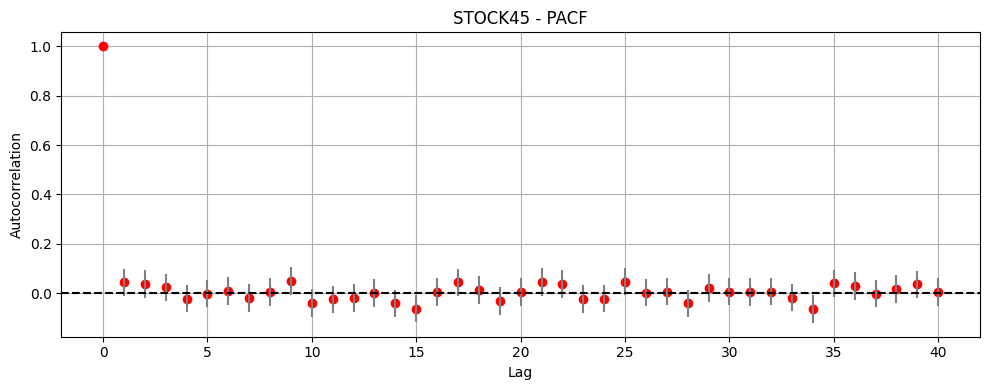


=== STOCK46 ===


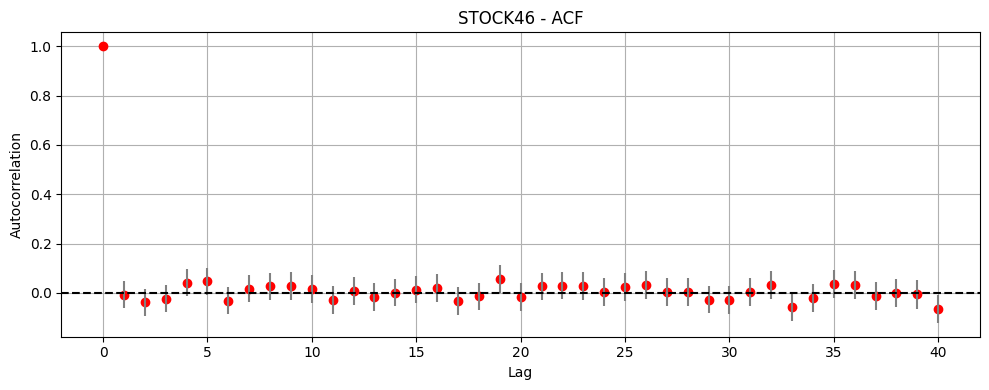

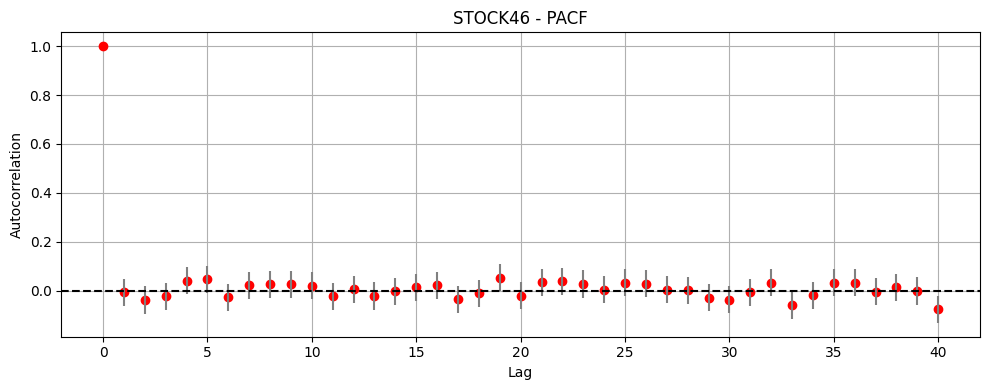


=== STOCK47 ===


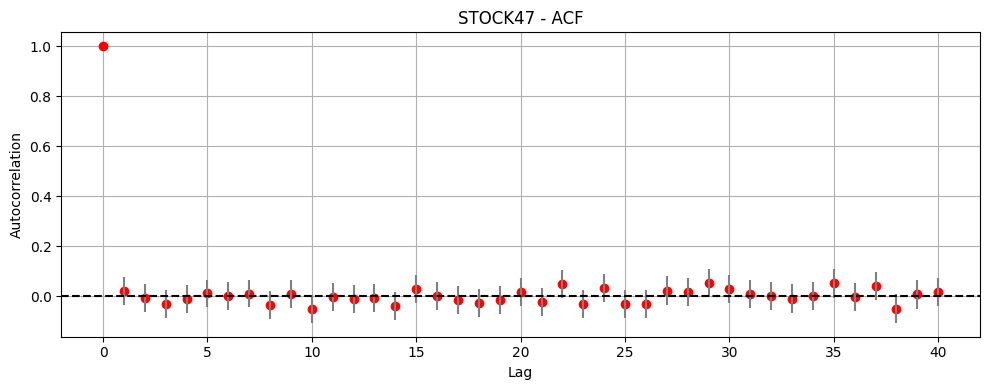

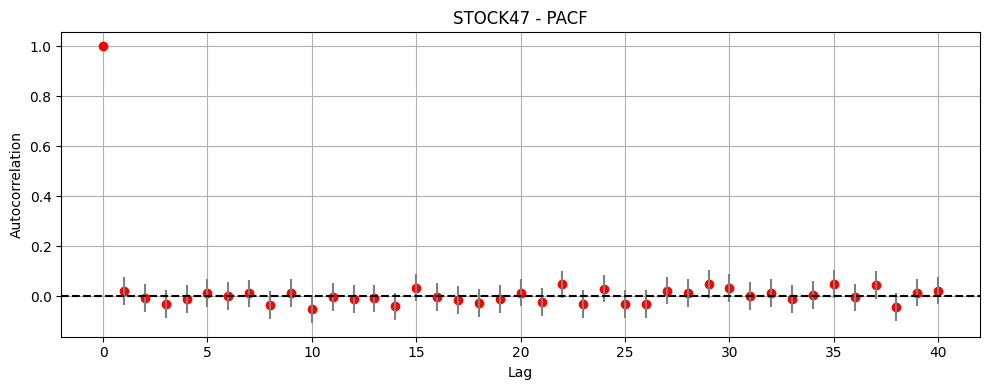


=== STOCK48 ===


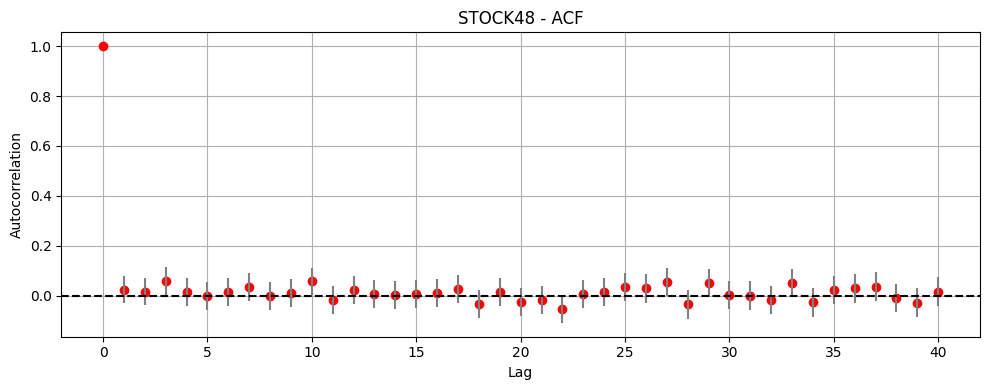

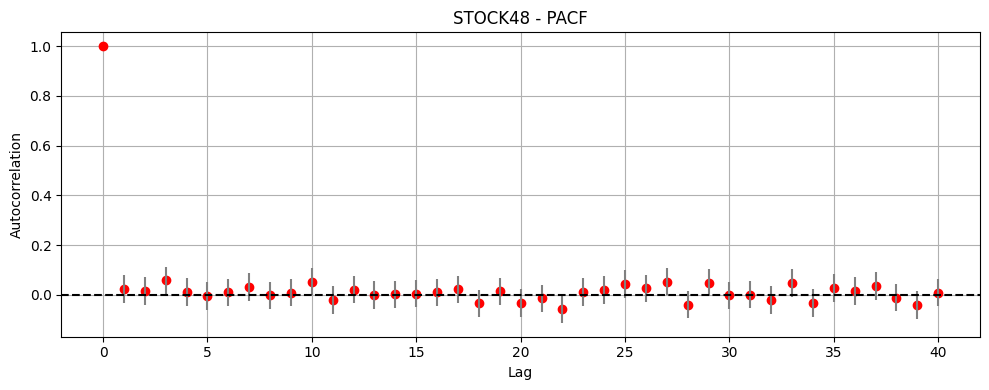


=== STOCK49 ===


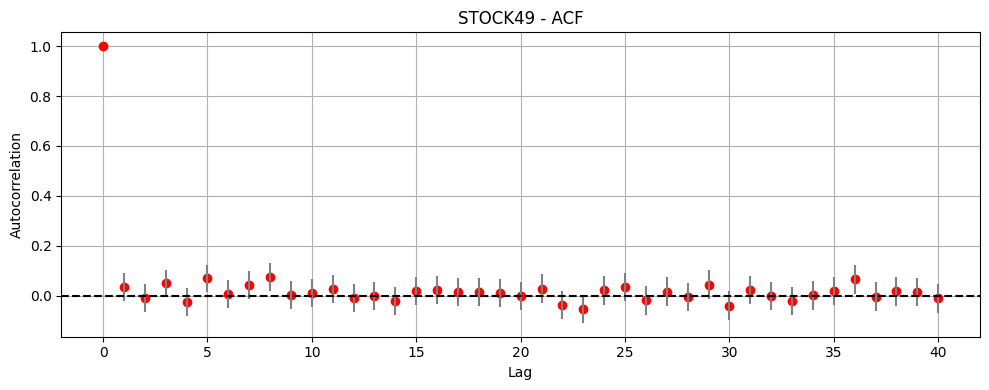

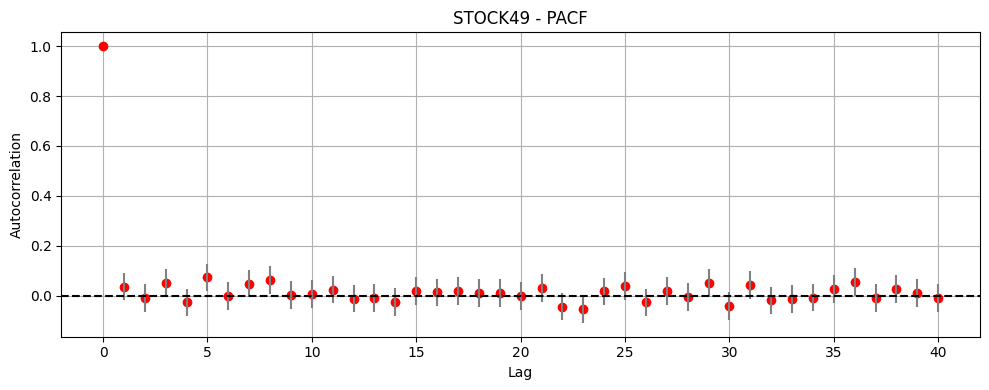


=== STOCK50 ===


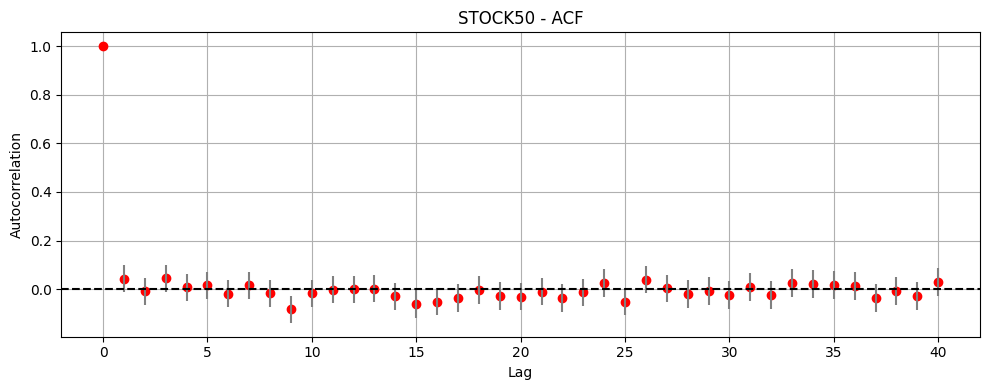

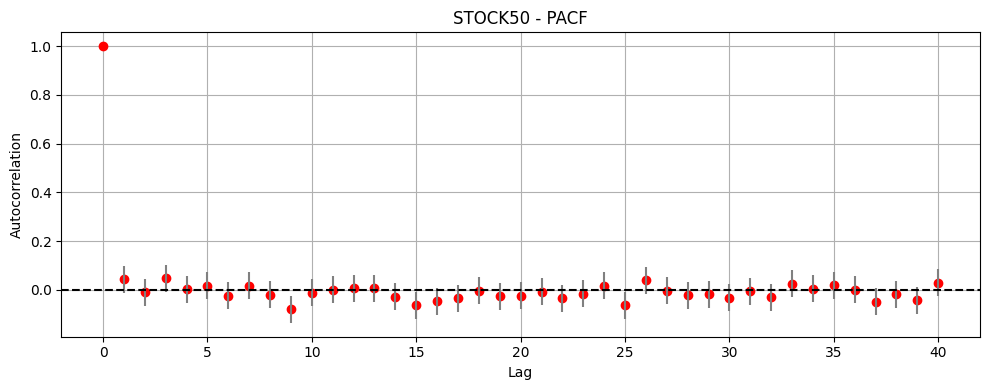

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# === Load Data ===
prices = pd.read_csv("./data/formatted_prices.csv")
prices["dates"] = pd.to_datetime(prices["dates"])
prices.set_index("dates", inplace=True)

# First 50 stocks
train_prices = prices.iloc[:, :50]
log_returns = np.log(train_prices / train_prices.shift(1)).dropna()

# === Parameters ===
nlags = 40  # Number of lags to plot
alpha = 0.05

# === Plot Function ===
def plot_acf_with_ci(values, confs, title="ACF"):
    errorbars = np.ndarray((2, len(values)))
    errorbars[0, :] = values - confs[:, 0]
    errorbars[1, :] = confs[:, 1] - values

    plt.figure(figsize=(10, 4))
    plt.plot(values, 'ro')
    plt.errorbar(range(len(values)), values, yerr=errorbars, fmt='none', ecolor='gray', capthick=2)
    plt.axhline(y=0, linestyle='--', color='black')
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Run ACF/PACF Visualisation for Each Stock ===
for col in log_returns.columns:
    series = log_returns[col].dropna()
    try:
        X_acf, X_acf_confs = acf(series, nlags=nlags, alpha=alpha)
        X_pacf, X_pacf_confs = pacf(series, nlags=nlags, alpha=alpha)
        
        print(f"\n=== {col} ===")
        plot_acf_with_ci(X_acf, X_acf_confs, title=f"{col} - ACF")
        plot_acf_with_ci(X_pacf, X_pacf_confs, title=f"{col} - PACF")

    except Exception as e:
        print(f"{col}: Could not compute ACF/PACF – {e}")
